<a href="https://colab.research.google.com/github/Kasaligan/Machine-Learning-UNS/blob/main/TP5/Clase_5_patrones_de_compras_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wholesale Customers
The goal of this project is to identify and describe the various customer segments hidden in the data based on their annual spending on diverse product categories, like milk, grocery, region, etc. More info about this dataset[here](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

customers = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectWC/data/wholesale_customers_data.csv")
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


---
###COMENTARIO: Si bien la practica correcta es incluir todas las librerias al comienzo del dataset, para que quede como un "cuentito" voy incluyendo librerias a medida que las uso.

---
#***ANÁLISIS DEL DATASET***

El dataset presenta los gastos anuales en diversas categorias de productos. El parametro que resulta interesante es:

· "Region": indica a que zona pertenece: Lisboa, Oporto u otra zona.

###**Análisis regional**
Podriamos plantear distintas formas de analizar el dataset en base a la region:

1.   Analizar el dataset completo ignorando estos parametros y tratar de encontrar algun patron global, pero es posible que distintos lugares tengan distintas tendencias de consumo y el resultado no sea representativo para cada uno por separado. Esto llevaria a que si se toman decisiones usando como base este analisis, las mismas podrian ser efectivas en algunos lugares y perjudiciales en otros. 
2.   El analisis separando cada una de las regiones podria darnos informacion efectiva para la toma local de decisiones, las cuales pueden ser delegadas a representantes locales. Aun asi es posible que haya patrones a nivel global y que puedan encararse campañas de marketing a gran escala. 

Como vemos existen dos paradigmas contradictorios: un modelo global puede no ser efectivo a nivel local y varios modelos locales pueden no ser efectivos a nivel global. 
Para abordar esto planteo las siguientes lineas de accion: 

1. Preparare modelos a nivel local.
2. Preparare un modelo a nivel global. 
3. Evaluare los clusters con una medida interna: coeficiente de silueta. 
4. Evaluare la similaridad entre los modelos locales con el modelo global. Para esto utilizare el indice Rand ajustado tomando cada modelo local y comparando con el global.
5. Segun los resultados de los pasos 3 y 4 determinare si el modelo global puede ser utilizado con seguridad para tomar decisiones o no. 


Sobre los parametros de evaluacion:
- Indice Rand Ajustado: Similar a la exactitud.Podemos usarlo para comparar datos etiquetados con sus predicciones o comparar la similaridad entre los agrupamientos de dos clusters. El indice sera utilizado de esta ultima forma. Al ser la version ajustada corrige los datos asignados por "chance". De ahora en mas, y por simplicidad, simplemente nos referiremos a este dato como indice Rand.

- Coeficiente de silueta: Ya que no existe un etiquetado previo debemos utilizar metricas internas para evaluar la calidad de nuestro clustering. Este indice nos da una idea de la coherencia de un dato con su cluster y la incoherencia con el resto. El indice va desde -1 a 1, donde valores cercanos a 1 indican que el dato esta muy relacionado a su cluster y muy poco relacionado a otros. 

--- 
#***CLUSTERING***

Deseo probar dos tecnicas. Originalmente queria incluir tambien Mean Shift, pero este esta orientado a conjuntos de datos "suaves" y el dataset que tengo no cumple con esa caracteristica. Intente implementarlo y los resultados no son buenos, investigue mas y note lo de datasets "suaves". Aun asi dejo el fragmento de codigo ya que era pequeño. En el otro ejercicio (crimenes US) si pude implementar el metodo con resultados mas bonitos.

####**Metodo divisivo: K-Means.**
La navaja suiza del clustering, no hace falta decir mas. Los parametros que nos interesan son:
- n_clusters: el numero de clusters que determinara el metodo.
- init: indica el metodo de eleccion de los centroides iniciales. Por defecto esta "k-means++" el cual se caracteriza como "decision inteligente". 
- n_init: la cantidad de veces que probara distintos centroides iniciales antes de quedarse con el mejor modelo (segun la metrica "inercia".

El resto de los parametros no son de nuestro interes por el momento.

####**Metodo aglomerativo: Clustering Jerarquico.**
La implementacion en sklearn es simplemente AgglomerativeClustering con parametros por defecto. El metodo sirve para grandes conjuntos de datos por lo que puedo utilizarlo sin medidas adicionales en el dataset. En este caso los parametros de interes son:

- n_clusters: el numero de clusters que determinara el metodo. 
- affinity: determina el tipo de distancia para utilizar en el calculo, la mantendremos en default (euclidea).
- linkage: determina la metrica que se busca minimizar durante la construccion de los clusters. Dejaremos la opcion por defecto, "ward", la cual minimiza la varianza de los clusters.

El resto de los parametros no son de nuestro interes. 

####**Eleccion de n_clusters**
No hay una funcion que automaticamente determine el numero optimo de clusters para un conjunto de datos. De hecho esto es un tema importante de debate. Existen muchas formas de determinar distintos numeros dependiendo de que parametro se quiere optimizar, pero en todos los casos requiere calcular los clusters para distintos "n" y evaluar ciertas metricas. Ya que la mayoria de las metricas de interes requieren preparar un script dedicado al calculo elijo el metodo del coeficiente de silueta el cual ya esta implementado en sklearn. En este metodo se busca maximizar el coeficiente de silueta que es el que mide la coherencia de los puntos dentro de los clusters y la "incoherencia", por asi decirlo, respecto al resto de los clusters. Evaluare distintos valores de "n" y preparare un grafico para determinar visualmente el valor optimo segun este criterio.

##**Expectativas del clustering**

Espero ver que el numero de clusters obtenido por el metodo divisivo inductivo coincida o sea cercano al numero de clusters determinado segun el criterio de silueta. 

Ademas esperaria que los datos terminen agrupados de forma relativamente similar, esto podre evaluarlo comparando ambos metodos con el indice Rand.

Un buen indicador de clusters es que el indice Rand de un valor alto al comparar el mismo dataset analizado con ambos metodos (divisivo y aglomerativo), indicando asi similaridad entre los modelos.

---
#***RESUMEN***

Para recapitular sintetizare la estrategia de abordaje y la forma de evaluar los resultados:

1. Separare el dataset por region.
2. Diseñare modelos locales y luego un modelo global ignorando localidades. Habra dos modelos en cada caso: k-means (divisivo) y clustering jerarquico (aglomerativo).
>- 2.1 Se probaran distintos numeros de clusters y se decidira el optimo segun el criterio de maximizacion de silueta. Un primer parametro de calidad sera que el numero de clusters sea el mismo para los dos metodos.
>- 2.2 Para los modelos nacidos de los mismos sub-datasets se evaluara la similaridad entre ambos metodos de clustering con el indice Rand. Si hay clusters bien definidos se esperara que ademas de coincidir en numero esten bien definidos y la similaridad sea alta.
3. Evaluare la calidad de cada clustering con el coeficiente de silueta. Un excelente modelo tendra valores cercanos a 1. Los mejores agrupamientos de cada dataset (divisivo o aglomerativo) pasaran a la siguiente etapa.
4. Evaluare la similaridad entre los modelos aislados con el modelo global utilizando el numero de clusters, el cual espero sea similar, y el indice Rand. Si la similaridad es alta significa que el modelo global puede ser utilizado para tomar decisiones, caso contrario seria indicativo que cada region/rubro tiene patrones de gastos bien diferenciados de los patrones globales.

NOTA SOBRE LA EVALUACION DE MODELOS LOCALES RESPECTO AL GLOBAL:

Uno podria pensar que es mas sencillo evaluar los modelos locales entre si en vez de evaluar cada uno con el global, puesto que si un conjunto de ellos guardan similaridad puede si puede desarrollarse entonces el modelo global con los que corresponda. Esto sin embargo no es escalable. 

Imaginemos que tenemos N modelos distintos. Si queremos comparar los N modelos entre si debemos comenzar comparando el primer modelo con los (N-1) restantes. Luego debemos comparar el segundo con los (N-2) restantes y asi. Es decir, los ciclos de comparacion seran de crecimiento (N-1)!

Por otro lado, si comparamos N modelos con el global solo se deben hacer N comparaciones. Si bien es cierto que asi se pierden posibles similaridades entre ciertos modelos, y que la comparacion anterior podria optimizarce (por ejemplo, si dos modelos "A" y "B" son fuertemente similares, se asume que el resto de los modelos similares a "A" lo son tambien con "B"), esto requeriria la preparacion de un codigo que, por la cantidad de modelos que evaluare, no se justifica. 

---
#CÓDIGO

Defino algunas fuciones (en realidad las desarrolle a lo largo del codigo pero las redefino para que quede mas ordenado y poder reutilizarlas a futuro). 
Estas funciones me ayudaran a:
- graficar las distribuciones de los datos del dataset
- estimar el valor de clusters optimo segun el criterio de silueta
- graficar los puntos del dataset el graficos "2D" enfrentando variables del mismo
- codigo de deteccion de outliers

In [2]:
def outliers_correction(df):
  from sklearn.neighbors import LocalOutlierFactor
  n_neighbors=int(np.round(np.sqrt(len(df))))
  lof=LocalOutlierFactor(n_neighbors=n_neighbors)
  outliers=lof.fit_predict(df)  #Esto es un array
  ind=np.where(outliers==-1)  #recupero los indices donde hay outliers
  df.drop(df.index[ind],inplace=True)
  df.reset_index(drop=True,inplace=True)
  print(df)
  print('Se corrigieron ', len(ind), ' outliers.\n')

In [3]:
def plot_distributions(df,intervalos=0): #la funcion grafica las distribuciones detro del dataset
  #el parametro df es el dataframe a analizar
  #intervalos son los intervalos para el histograma, por defecto recae en la raiz cuadrada del largo del dataframe
  rango=len(df.columns)#El numero de intervalos en el histograma
  if intervalos==0:
    intervalos=round(np.sqrt(len(df)))
  Tot = rango             #number_of_subplots
  Cols = rango//2         #number_of_columns
  # Compute Rows required
  Rows = Tot // Cols 
  Rows += Tot % Cols
  plt.figure()
  plt.figure(figsize=(30,15))
  print('GRAFICOS DE ', str)
  for i in range(rango):  
    v=i+1               #esto va aca pues i inicia en cero y el primer subplot es de indice 1
    plt.subplot(Rows,Cols,v)
    plt.hist(df.iloc[:,i], bins=intervalos, color='#F2AB6D', rwidth=0.85)
    plt.title(df.columns[i])

In [4]:
def clusters_segun_silueta(df,clustering_method,cluster_min,cluster_max,graficar=0,size_x=30,size_y=30): 
  #la funcion determina el nuumero optimo de clusters segun coeficiente de silueta y tiene la opcion de graficar 2D parametros enfrentados
  #df=dataframe a analizar
  #clustering_method: metodo de clustering que tenga como parametro n_clusters
  #cluster_min y cluster_max: minimo y maximo numero de clusters a evaluar
  #grafica: "0" si no se quieren graficar las variables enfrentadas separadas en clusters en 2D, "1" para graficarlas
  #size_x,size_y determinan el tamaño de los graficos

  from sklearn.metrics import silhouette_score

  sil_score=-1  #Defino el valor minimo posible del coeficiente de silueta 

  for i in range(cluster_min,cluster_max):
    caux=clustering_method.set_params(n_clusters=i) #defino Cluser AUXiliar con el numero de clusters de la iteracion
    caux_aux_labels=caux.fit_predict(df)    #obtengo las etiquetas de separacion de los datos
    s=silhouette_score(df,caux_aux_labels)  #obtengo el coeficiente de silueta
    if s>sil_score:                                 #si es un nuevo maximo de coeficiente
      sil_score=s                                   #almacena el valor
      n_clusters_ideal=i                            #y guarda la cantidad de clusters que lo produjo

  print('El numero de clusters ideal segun coeficiente de silueta es: ', n_clusters_ideal)

  caux=clustering_method.set_params(n_clusters=n_clusters_ideal) #defino un modelo auxiliar con el numero de clusters ideal (segun este criterio)
  caux_labels=caux.fit_predict(df)            #obtengo las etiquetas 
  print(caux_labels)

#from sklearn.neighbors.nearest_centroid import NearestCentroid    #fragmento de codigo para mostrar los centroides
#clf = NearestCentroid()
#clf.fit(df, caux_labels)
#print(clf.centroids_)

#Grafico los datos si graficar es 1
  if graficar==1:
    colors = ['#f40b0b','#2bf40b','#0b61f4','#f4ea0b','#0bf4bf','#d8bfd8','#008080','#7e3d19','#c4e516','#d40fa4','#0fbbd4']        #Voy a necesitar colores, creo un vector de colores                                                
    marker = ['^', 'o', 's', '+', '.' , '*','^', 'o', 's', '+', '.' , '*','^', 'o', 's', '+', '.' , '*']       #Tambien necesito diferentes marcadores

    rango=len(df.columns)     #El numero de columnas o parametros del sub-dataset
    Tot = rango*rango             #number_of_subplots
    Cols = rango         #number_of_columns
    # Compute Rows required
    Rows = Tot // Cols 
    Rows += Tot % Cols
    plt.figure()
    plt.figure(figsize=(size_x,size_y))

    df_dict={}    #Creo un diccionario para almacena los dataframes auxiliares necesarios para graficar

    for k in range(0,n_clusters_ideal):        #repetir para generar tantos dataset como clusters (OPTIMIZAR)
      ind=np.where(caux_labels==k)
      df_dict[k]=df.drop(df.index[ind])

    v=0
    for i in range(rango):
      for j in range(rango):
        #print(i,j)
        v=v+1              #esto va aca pues i inicia en cero y el primer subplot es de indice 1
        if j>=i:
          plt.subplot(Rows,Cols,v)
          for k in range(0,n_clusters_ideal):
            plt.scatter(df_dict[k].iloc[:,i],df_dict[k].iloc[:,j],c= colors[k], marker=marker[k])
            title=(df_dict[k].columns[i], ' vs ', df_dict[k].columns[j])
          plt.title(title)
  


In [5]:
def graficar_columnas_enfrentadas(df,etiquetas,size_x=30,size_y=30):  
  #la funcion grafica parametros enfrentados del dataframe en graficos 2D
  #df es el dataframe basem etiqueta debe contener elementos enteros
  #etiquetas son las del dataset, deben ser elementos enteros
  #size_x,size_y determinan el tamaño de los graficos
  colors = ['#f40b0b','#2bf40b','#0b61f4','#f4ea0b','#0bf4bf','#d8bfd8','#008080','#7e3d19','#c4e516','#d40fa4','#0fbbd4']        #Voy a necesitar colores, creo un vector de colores                                                
  marker = ['^', 'o', 's', '+', '.' , '*','^', 'o', 's', '+', '.' , '*','^', 'o', 's', '+', '.' , '*']       #Tambien necesito diferentes marcadores
  rango=len(df.columns)     #El numero de columnas o parametros del sub-dataset
  Tot = rango*rango             #number_of_subplots
  Cols = rango         #number_of_columns
  # Compute Rows required
  Rows = Tot // Cols 
  Rows += Tot % Cols
  plt.figure()
  plt.figure(figsize=(size_x,size_y))

  df_dict={}    #Creo un diccionario para almacena los dataframes auxiliares necesarios para graficar

  for k in range(0,max(etiquetas)):        #genero los df con los datos etiquetados separados
    ind=np.where(etiquetas==k)
    df_dict[k]=df.drop(df.index[ind])

  v=0
  for i in range(rango):
    for j in range(rango):
      #print(i,j)
      v=v+1              #esto va aca pues i inicia en cero y el primer subplot es de indice 1
      if j>=i:
        plt.subplot(Rows,Cols,v)
        for k in range(0,max(etiquetas)):
          plt.scatter(df_dict[k].iloc[:,i],df_dict[k].iloc[:,j],c= colors[k], marker=marker[k])
          title=(df_dict[k].columns[i], ' vs ', df_dict[k].columns[j])
        plt.title(title)
  

---
##PREPARACION DEL DATASET

Primero que nada analizo las distribuciones del dataset.

GRAFICOS DE  <class 'str'>


<Figure size 432x288 with 0 Axes>

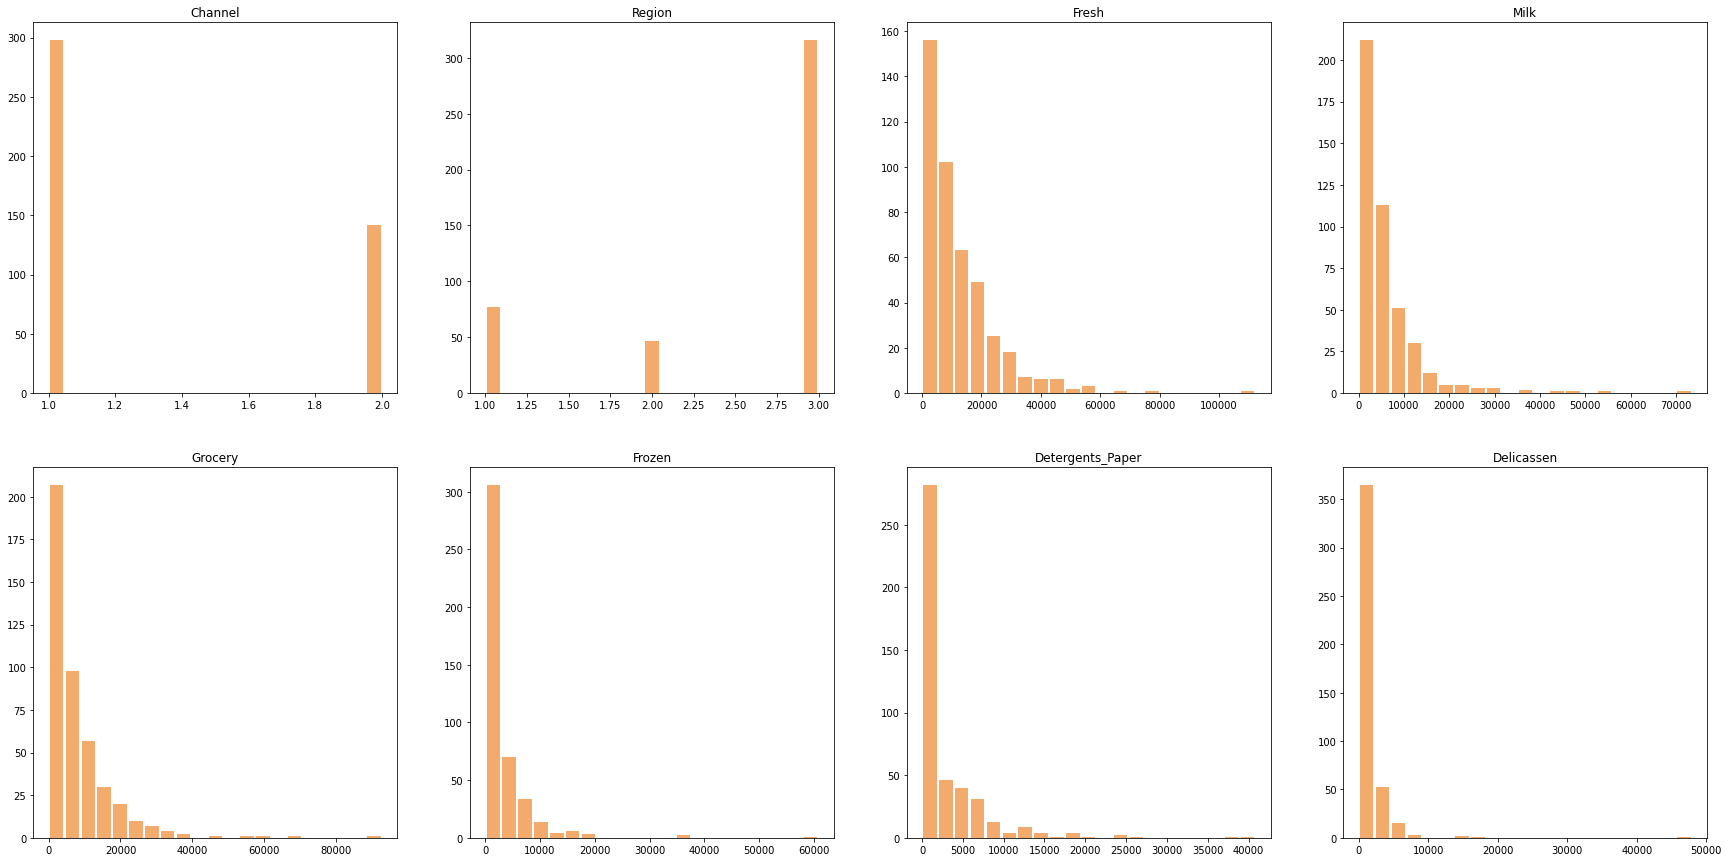

In [6]:
plot_distributions(customers)

Veo la presencia de ciertos outliers, trato de eliminarlos.

In [7]:
outliers_correction(customers)

     Channel  Region  Fresh  ...  Frozen  Detergents_Paper  Delicassen
0          2       3  12669  ...     214              2674        1338
1          2       3   7057  ...    1762              3293        1776
2          2       3   6353  ...    2405              3516        7844
3          1       3  13265  ...    6404               507        1788
4          2       3  22615  ...    3915              1777        5185
..       ...     ...    ...  ...     ...               ...         ...
402        1       3  16731  ...     688              2371         838
403        1       3  39228  ...    4510                93        2346
404        2       3  14531  ...     437             14841        1867
405        1       3  10290  ...    1038               168        2125
406        1       3   2787  ...      65               477          52

[407 rows x 8 columns]
Se corrigieron  1  outliers.



Compruebo si funciono.

GRAFICOS DE  <class 'str'>
407


<Figure size 432x288 with 0 Axes>

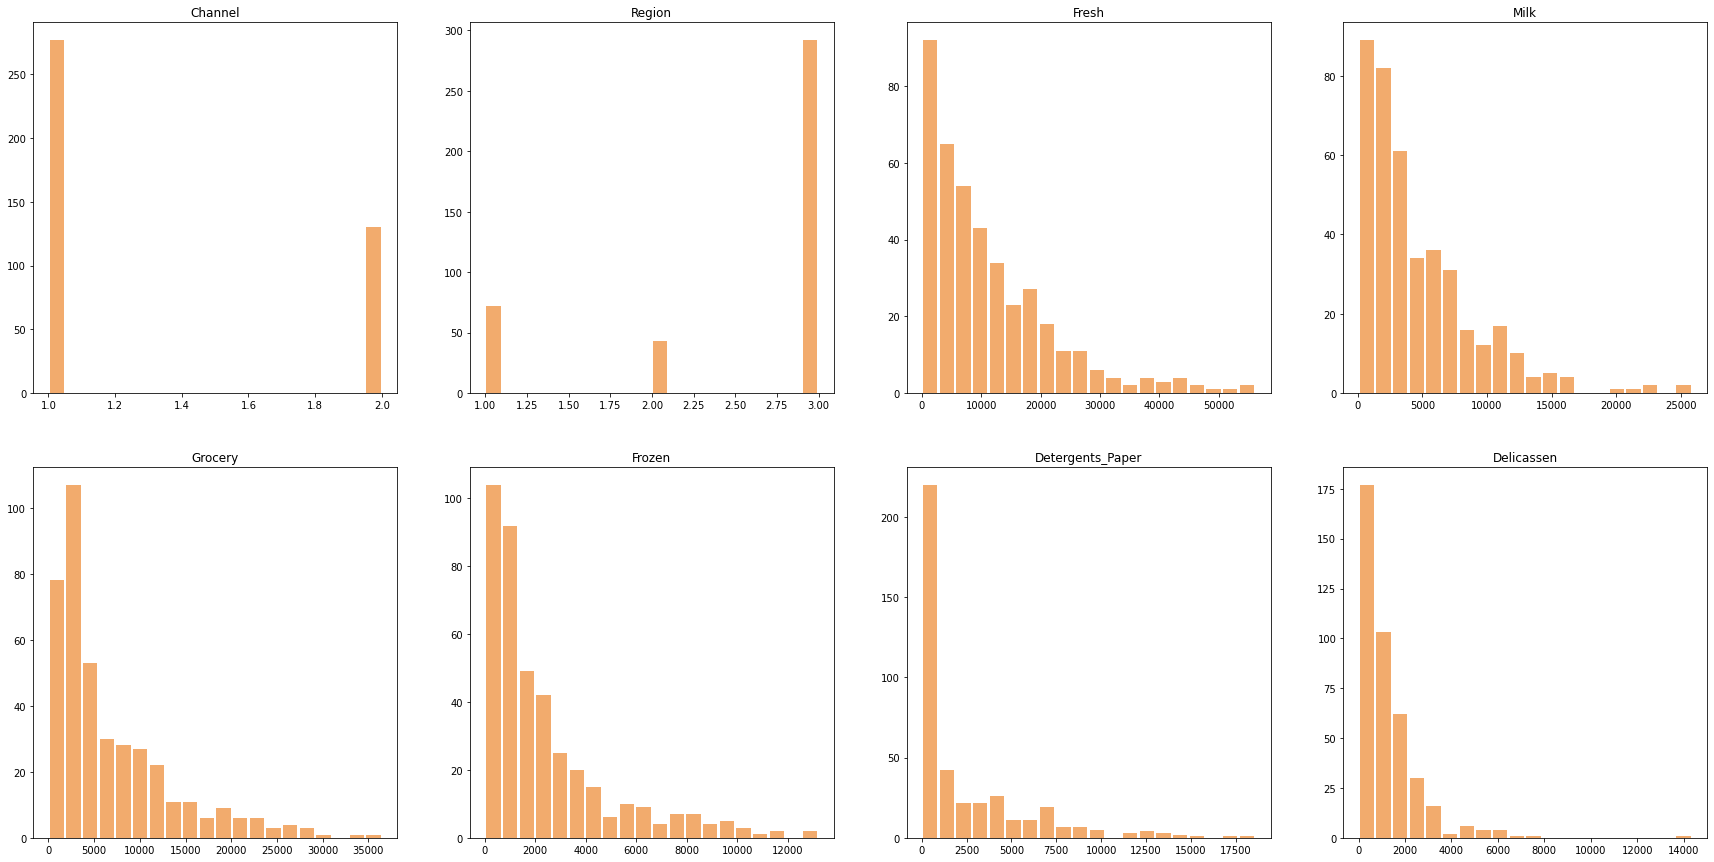

In [8]:
plot_distributions(customers)
print(len(customers))

Compruebo que han mejorado las distribuciones con la eliminacion de los anomalos y continuo.

Separo el dataset tres sub-datasets segun region.

In [9]:
ctm_lisbon=customers[customers['Region']==1]
ctm_lisbon=ctm_lisbon.drop(['Region'],axis=1)
ctm_oporto=customers[customers['Region']==2]
ctm_oporto=ctm_oporto.drop(['Region'],axis=1)
ctm_difreg=customers[customers['Region']==3]
ctm_difreg=ctm_difreg.drop(['Region'],axis=1)

ctm_global=customers.drop(['Region'],axis=1)

In [10]:
#cuento elementos para confirmar la separacion segun informacion del dataset
print('Cantidad de elementos en lisbon: ' , len(ctm_lisbon.index))
print('Cantidad de elementos en oporto: ' , len(ctm_oporto.index))
print('Cantidad de elementos en otraregion: ' , len(ctm_difreg.index))

Cantidad de elementos en lisbon:  72
Cantidad de elementos en oporto:  43
Cantidad de elementos en otraregion:  292


Muestro distribuciones. Preparo para esto una funcion.

GRAFICOS DE  <class 'str'>
GRAFICOS DE  <class 'str'>
GRAFICOS DE  <class 'str'>
GRAFICOS DE  <class 'str'>


<Figure size 432x288 with 0 Axes>

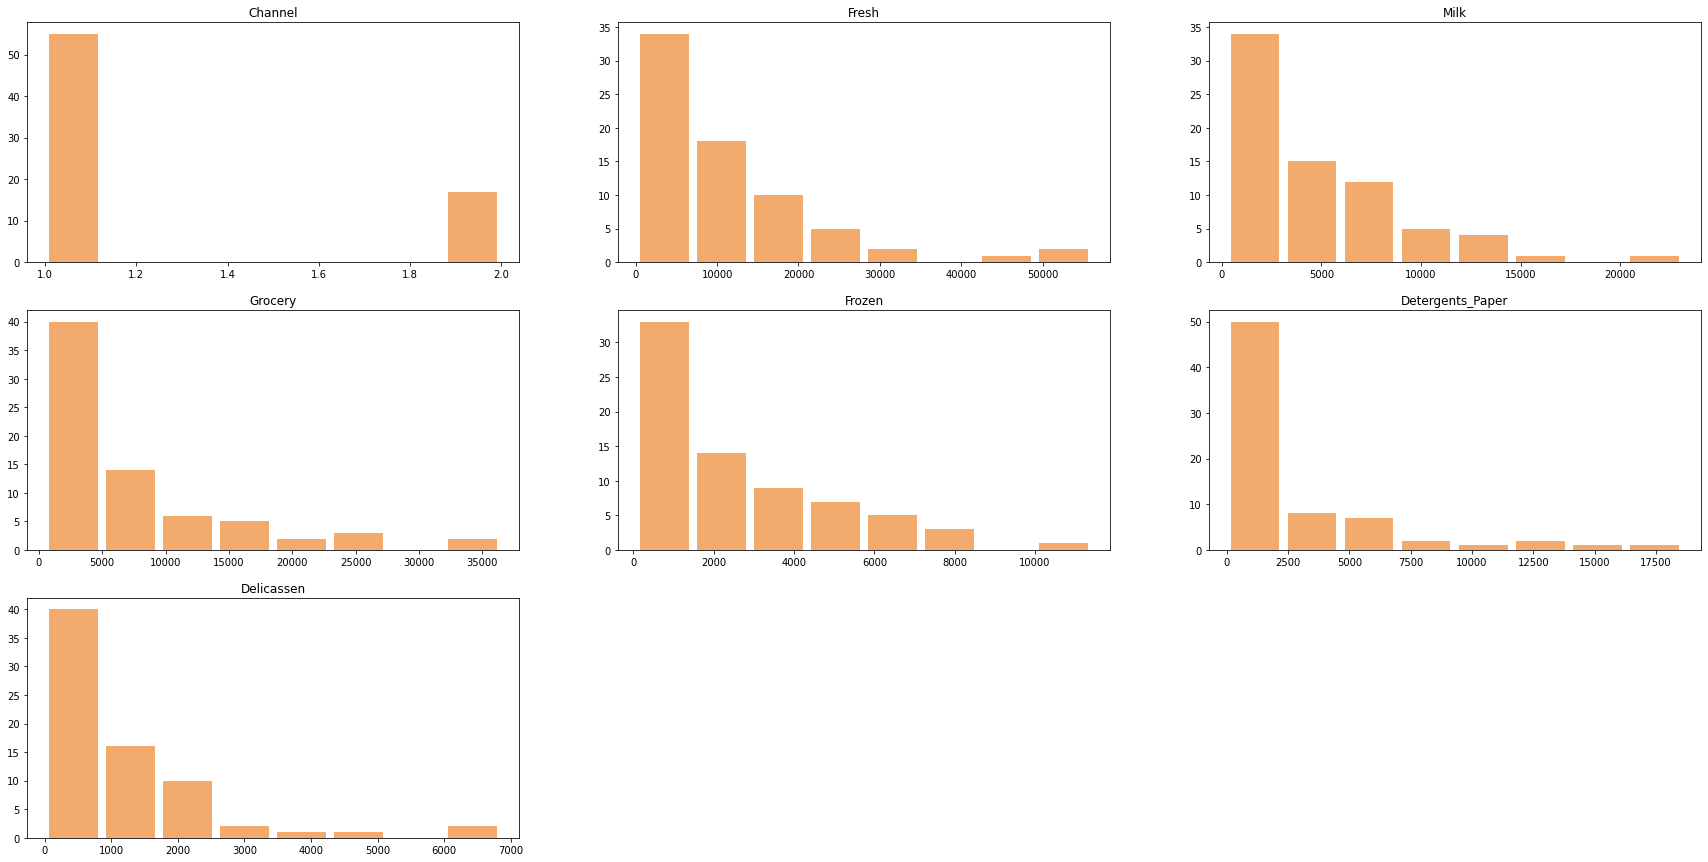

<Figure size 432x288 with 0 Axes>

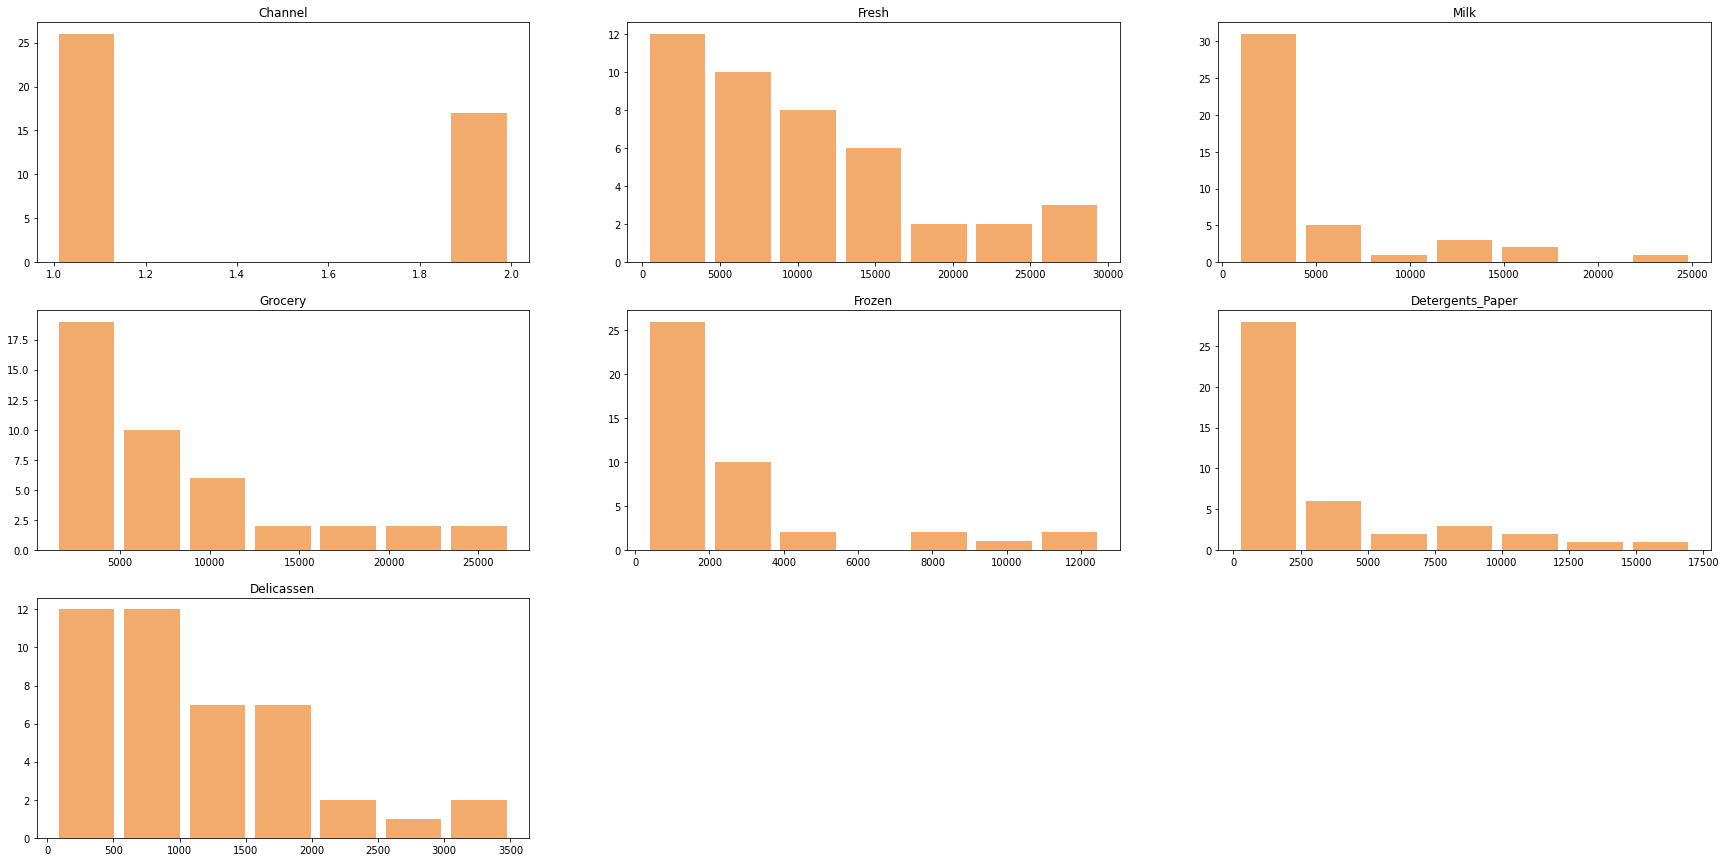

<Figure size 432x288 with 0 Axes>

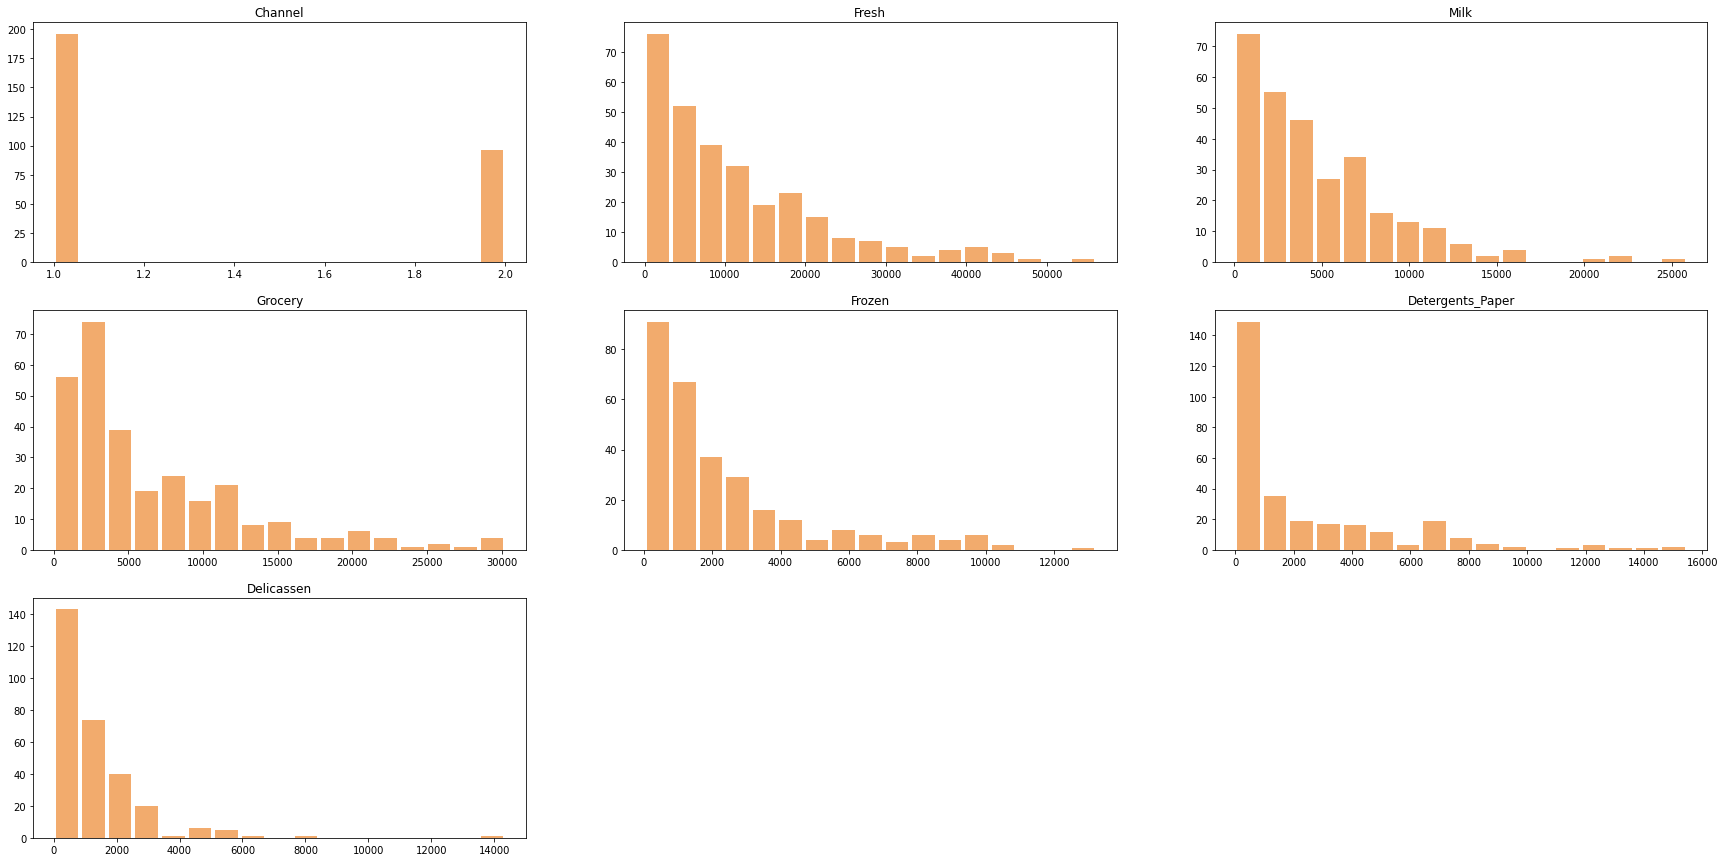

<Figure size 432x288 with 0 Axes>

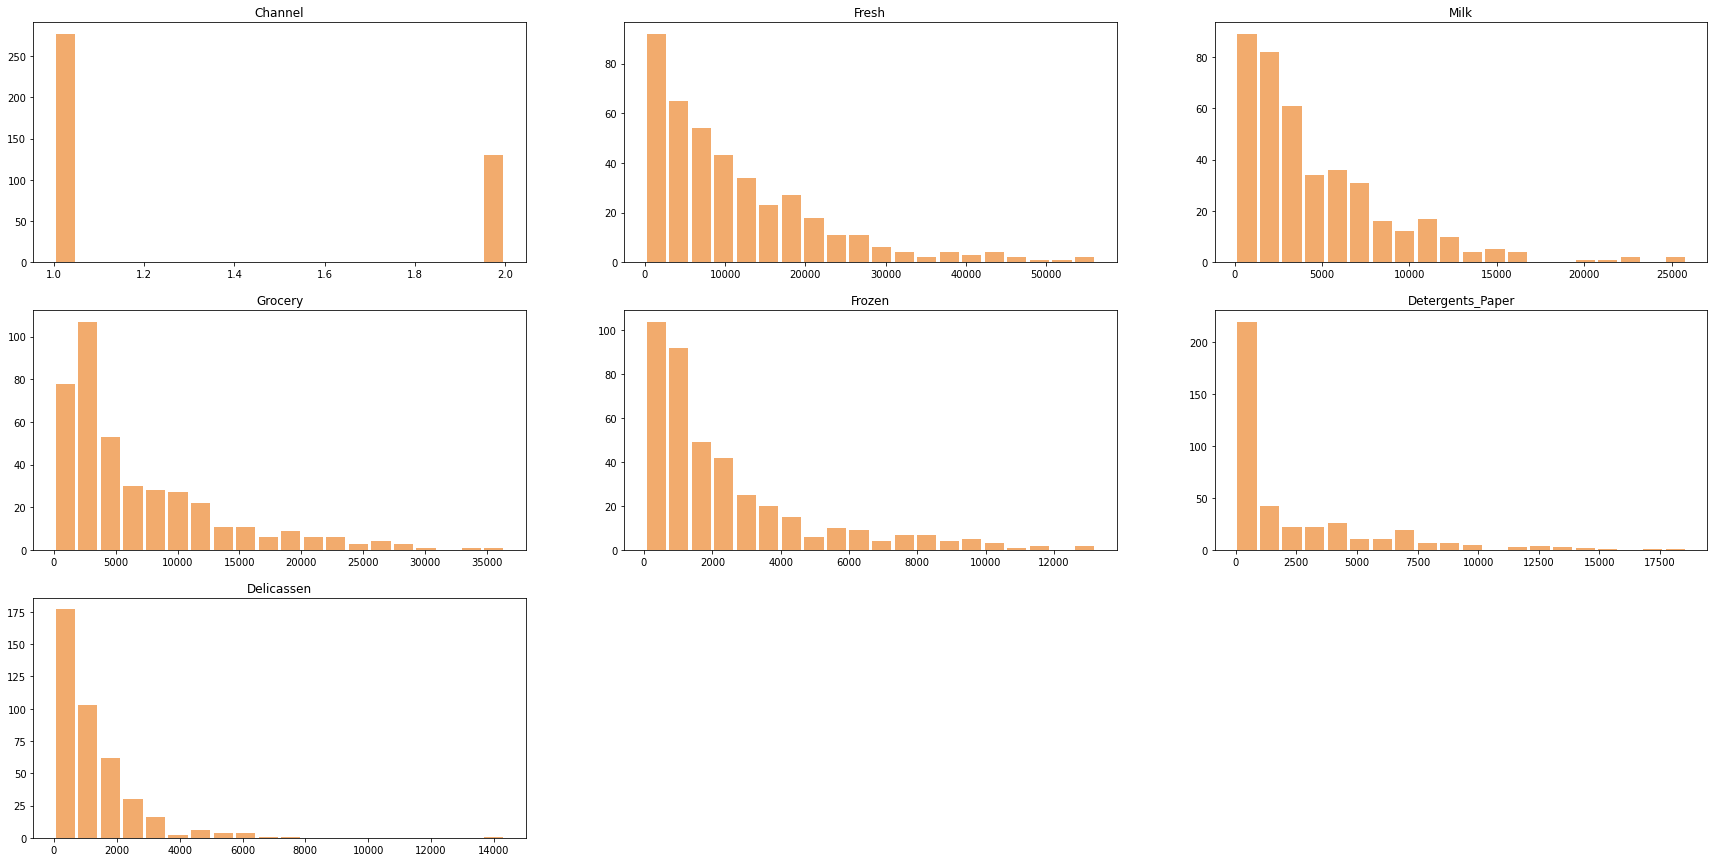

In [11]:
plot_distributions(ctm_lisbon)
plot_distributions(ctm_oporto)
plot_distributions(ctm_difreg)
plot_distributions(ctm_global)

---
##K-MEANS

In [12]:
from sklearn.cluster import KMeans #Importo K-MEANS

A continuacion determino numero optimo de clusters segun coeficiente de silueta.

El numero de clusters ideal segun coeficiente de silueta es:  3
[2 2 2 1 1 0 2 2 1 2 2 2 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 2 2 0 0 0 2 2 2 1 2 2 2 2 2 1 2 0 0 2 2 0 0 2 2 0 2 1 1 0 1 2 2 2 2]
El numero de clusters ideal segun coeficiente de silueta es:  2
[1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0]
El numero de clusters ideal segun coeficiente de silueta es:  2
[1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1
 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1
 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0
 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 

<Figure size 432x288 with 0 Axes>

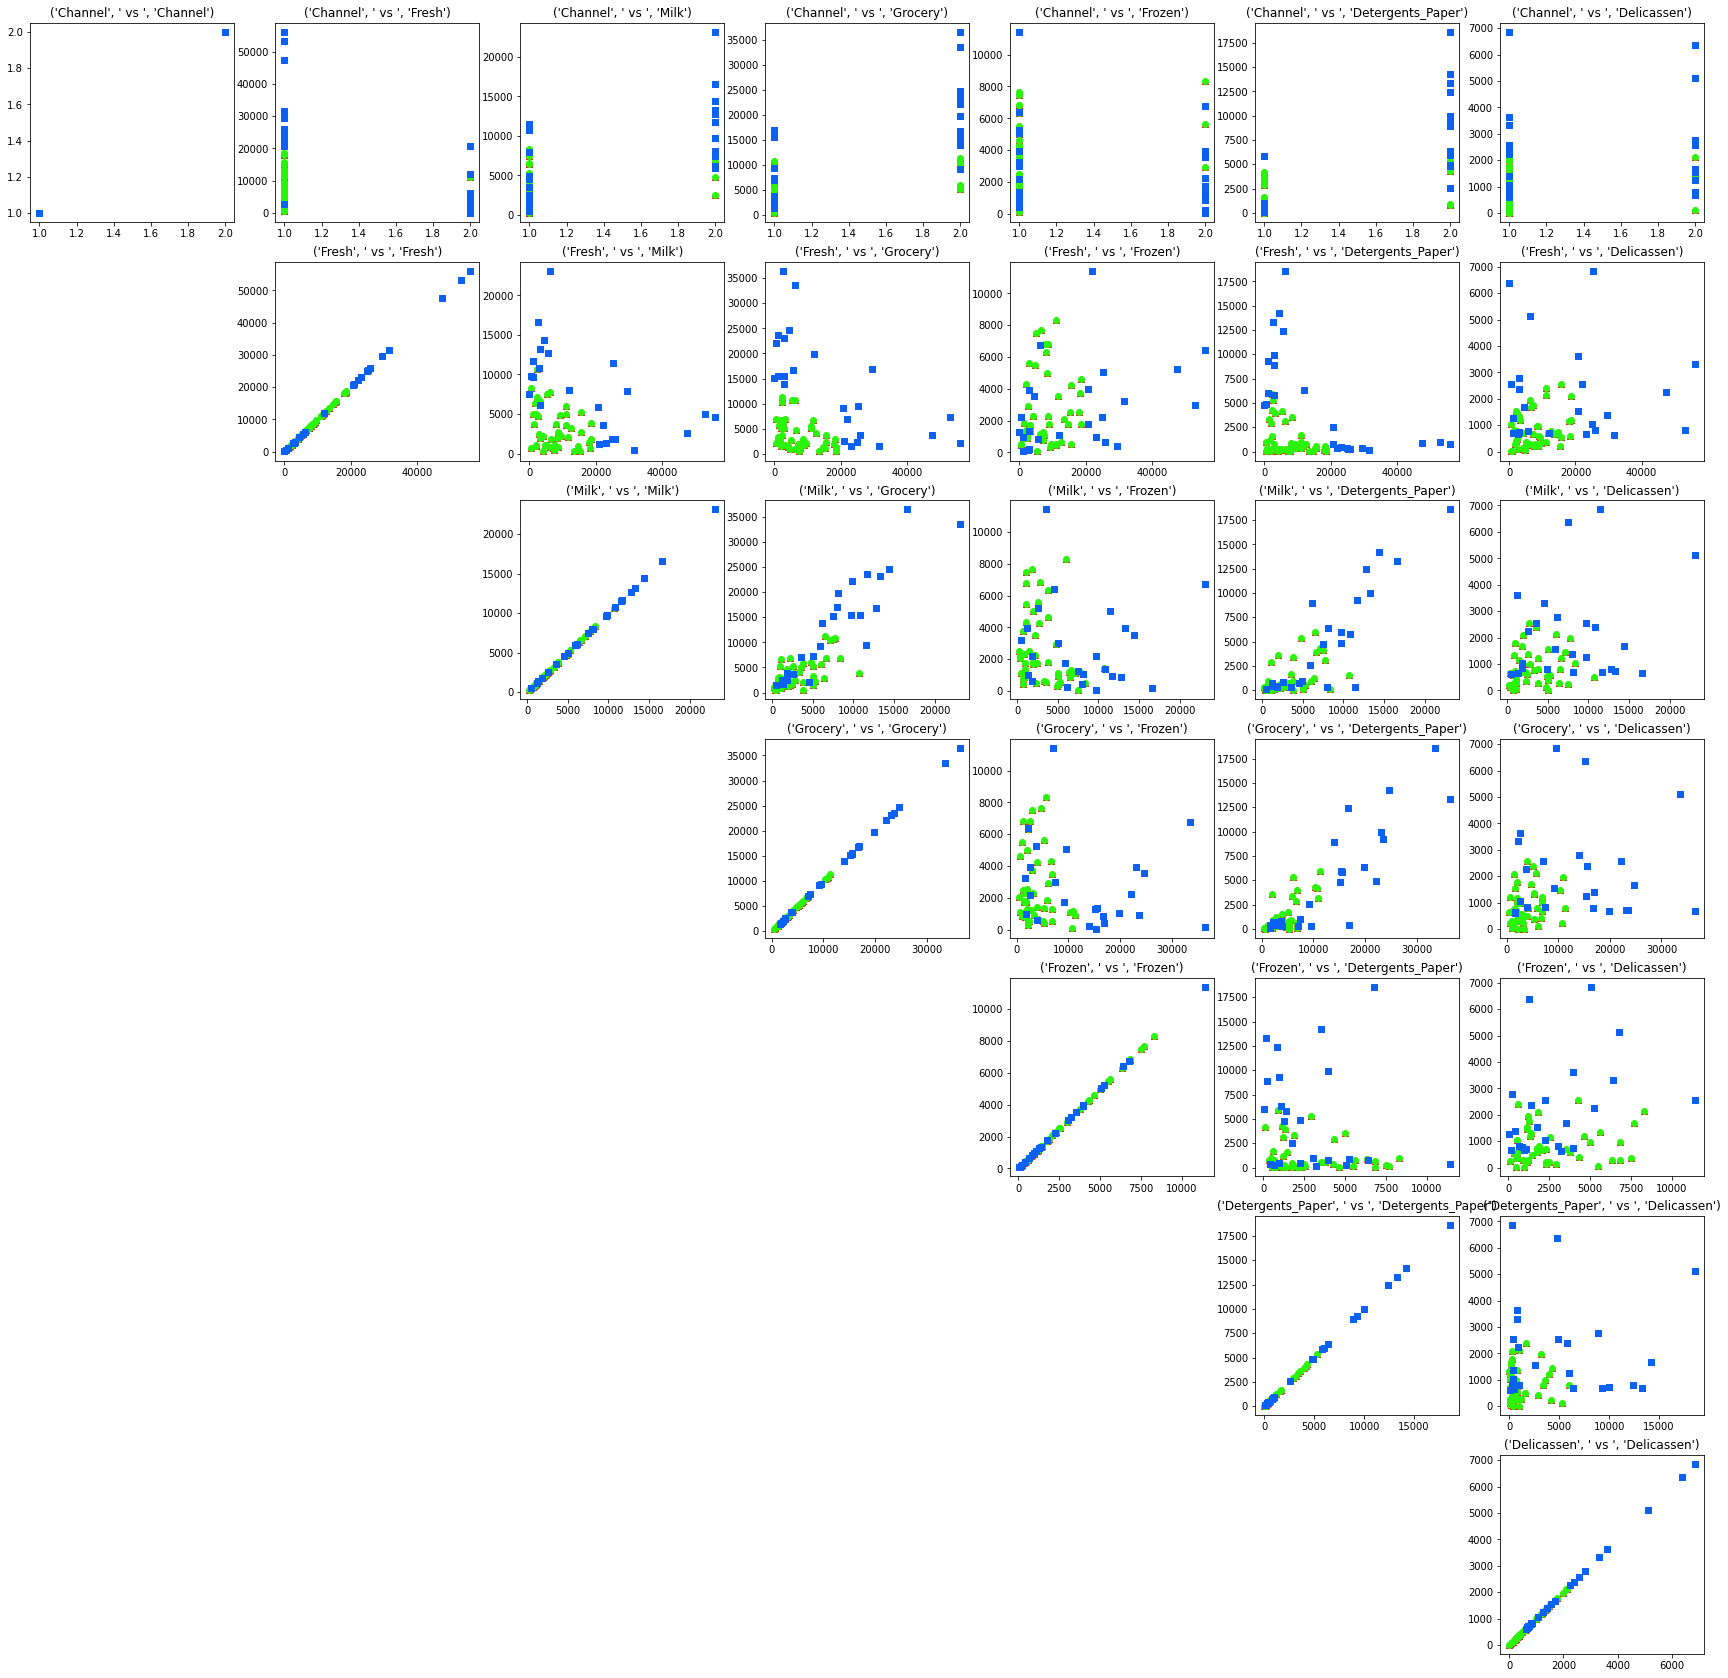

<Figure size 432x288 with 0 Axes>

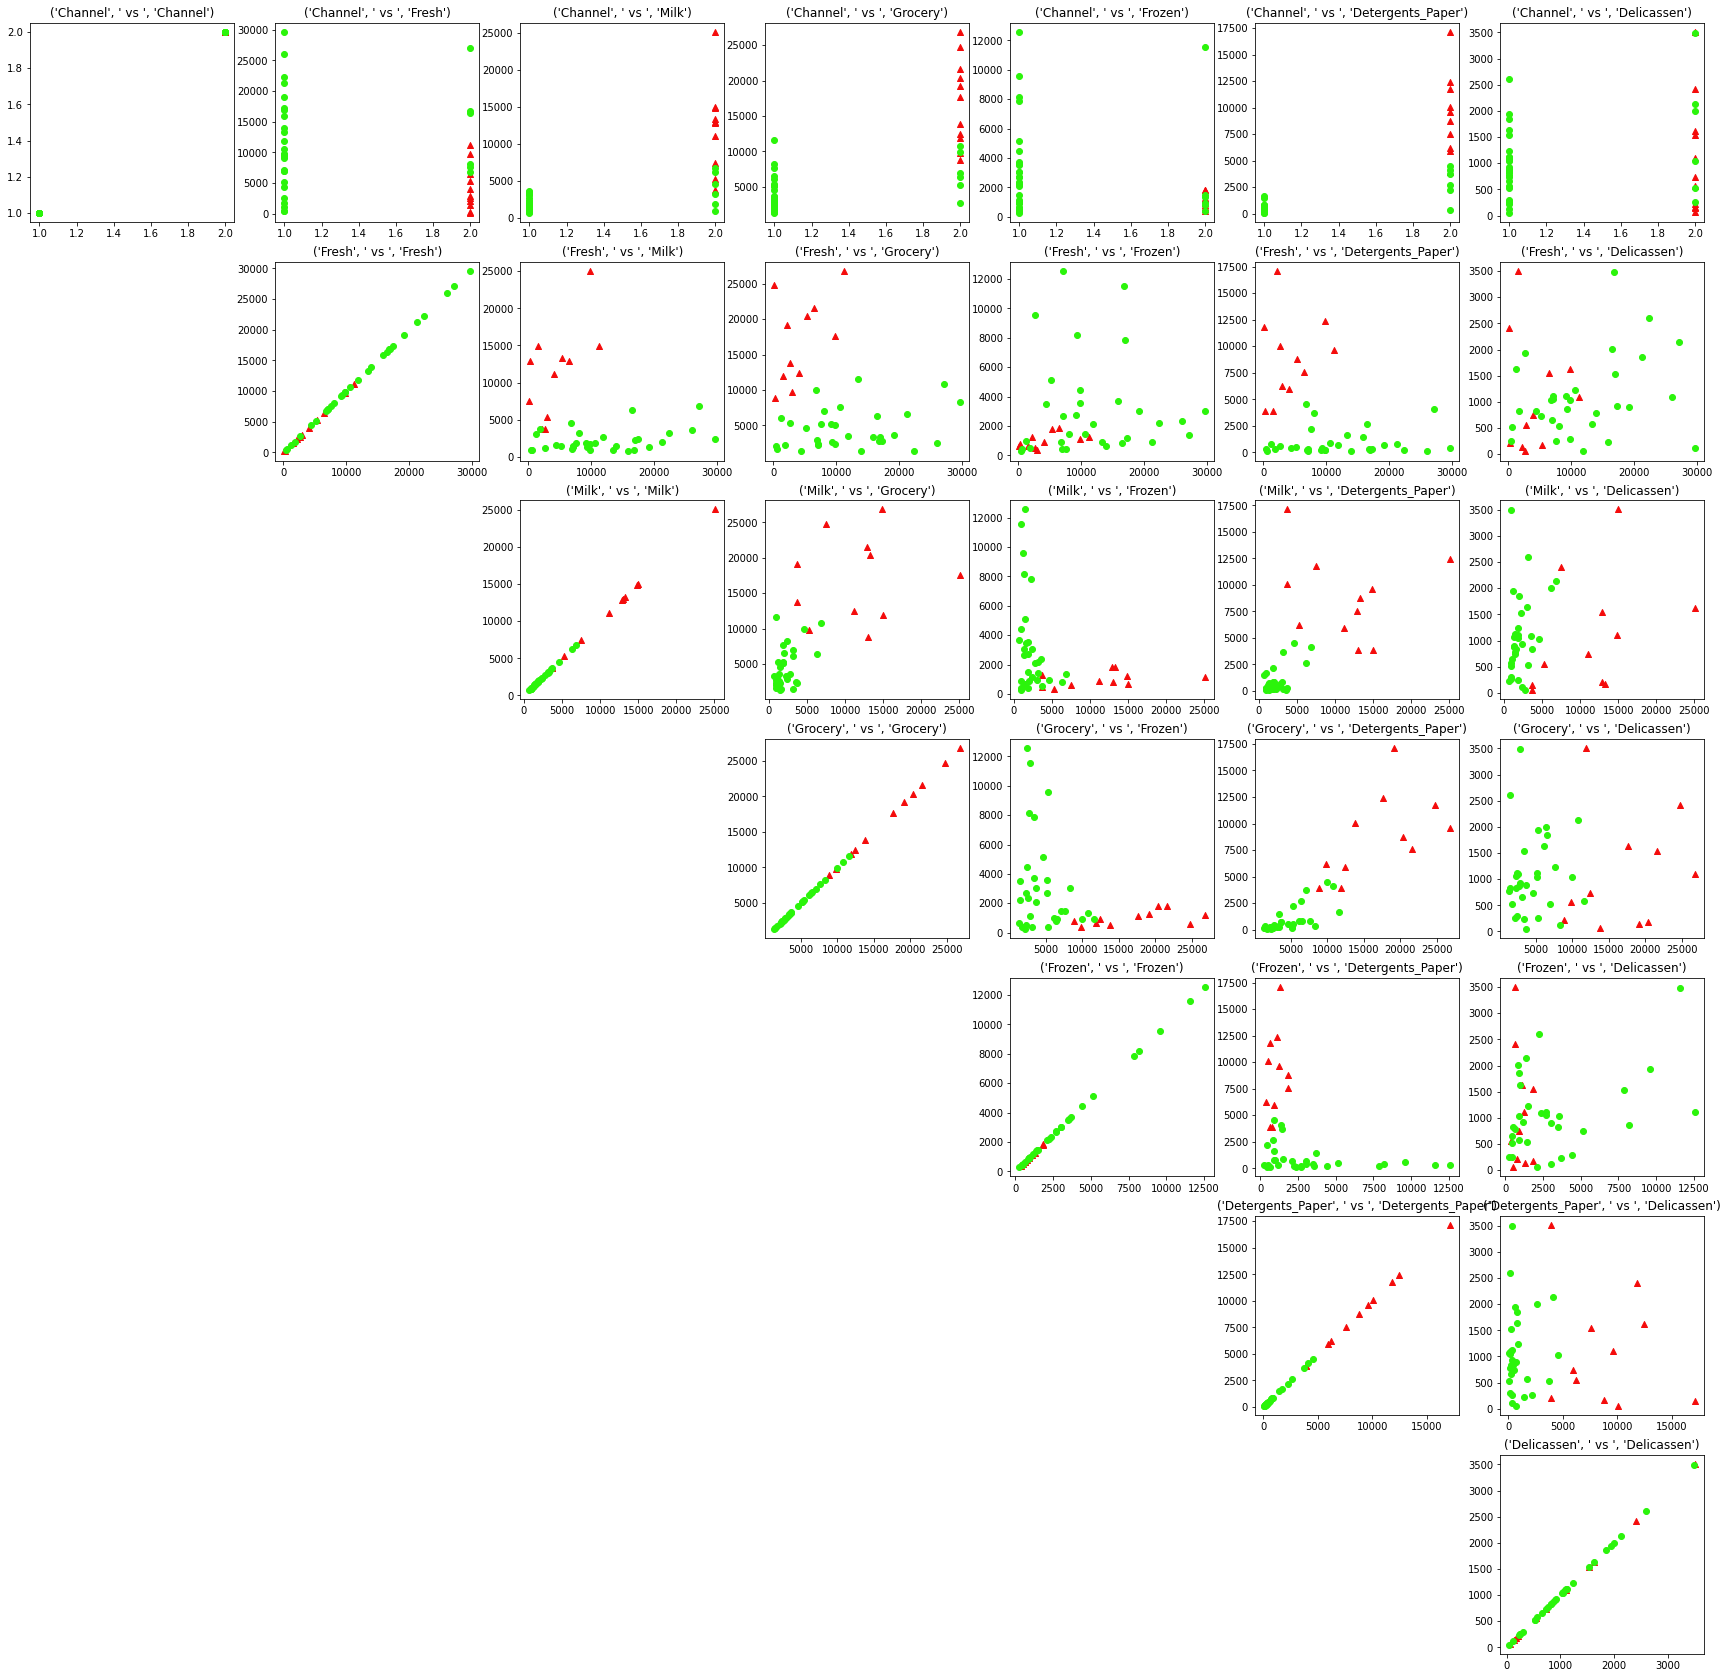

<Figure size 432x288 with 0 Axes>

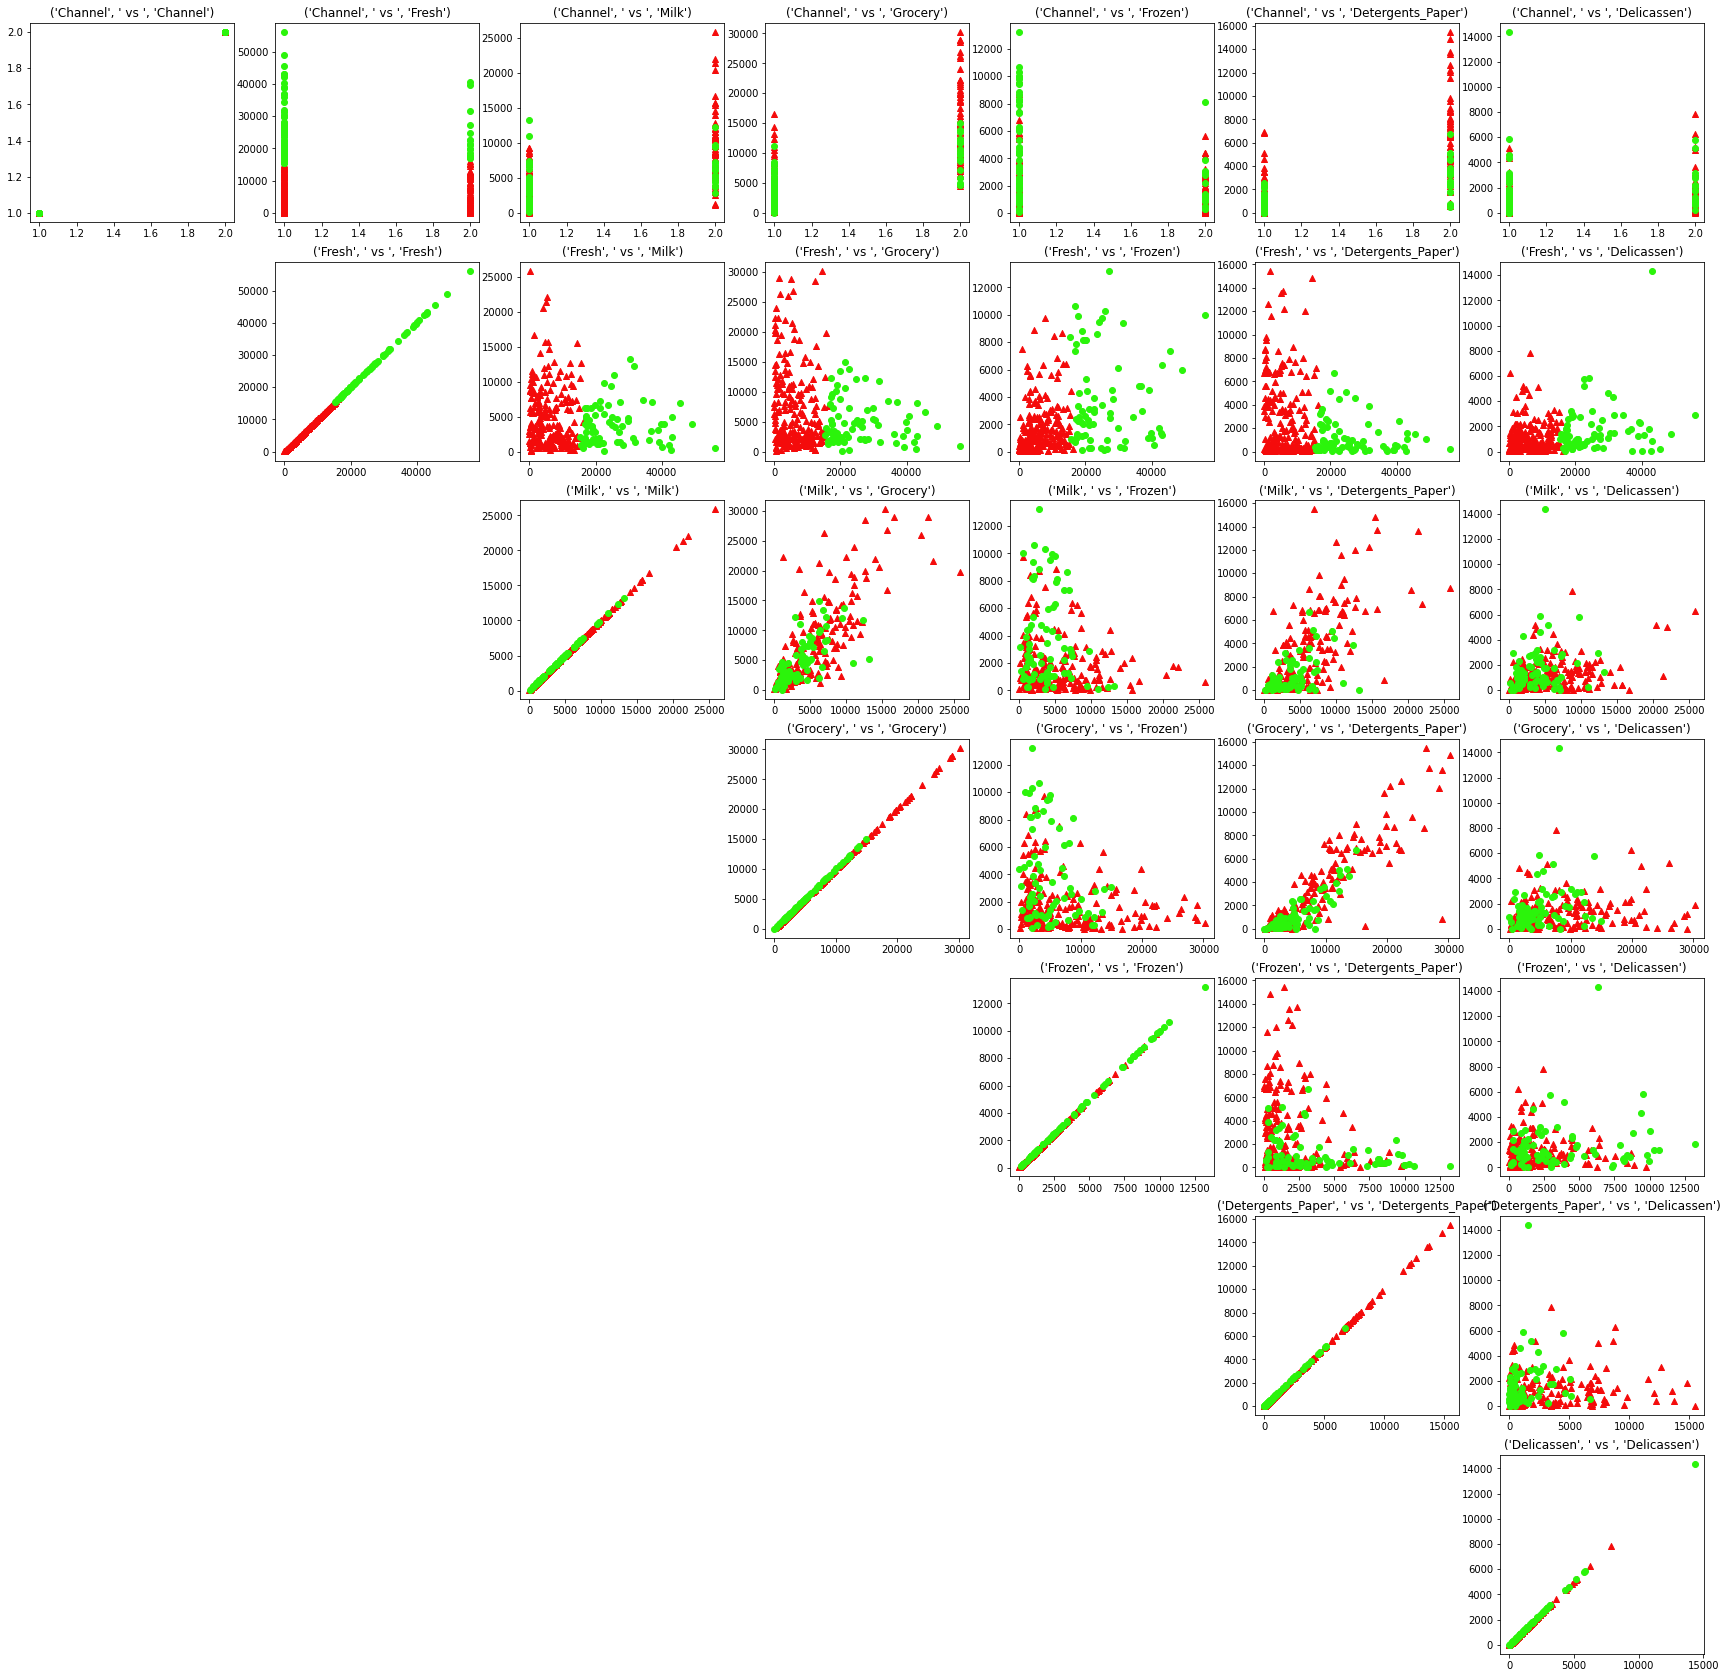

<Figure size 432x288 with 0 Axes>

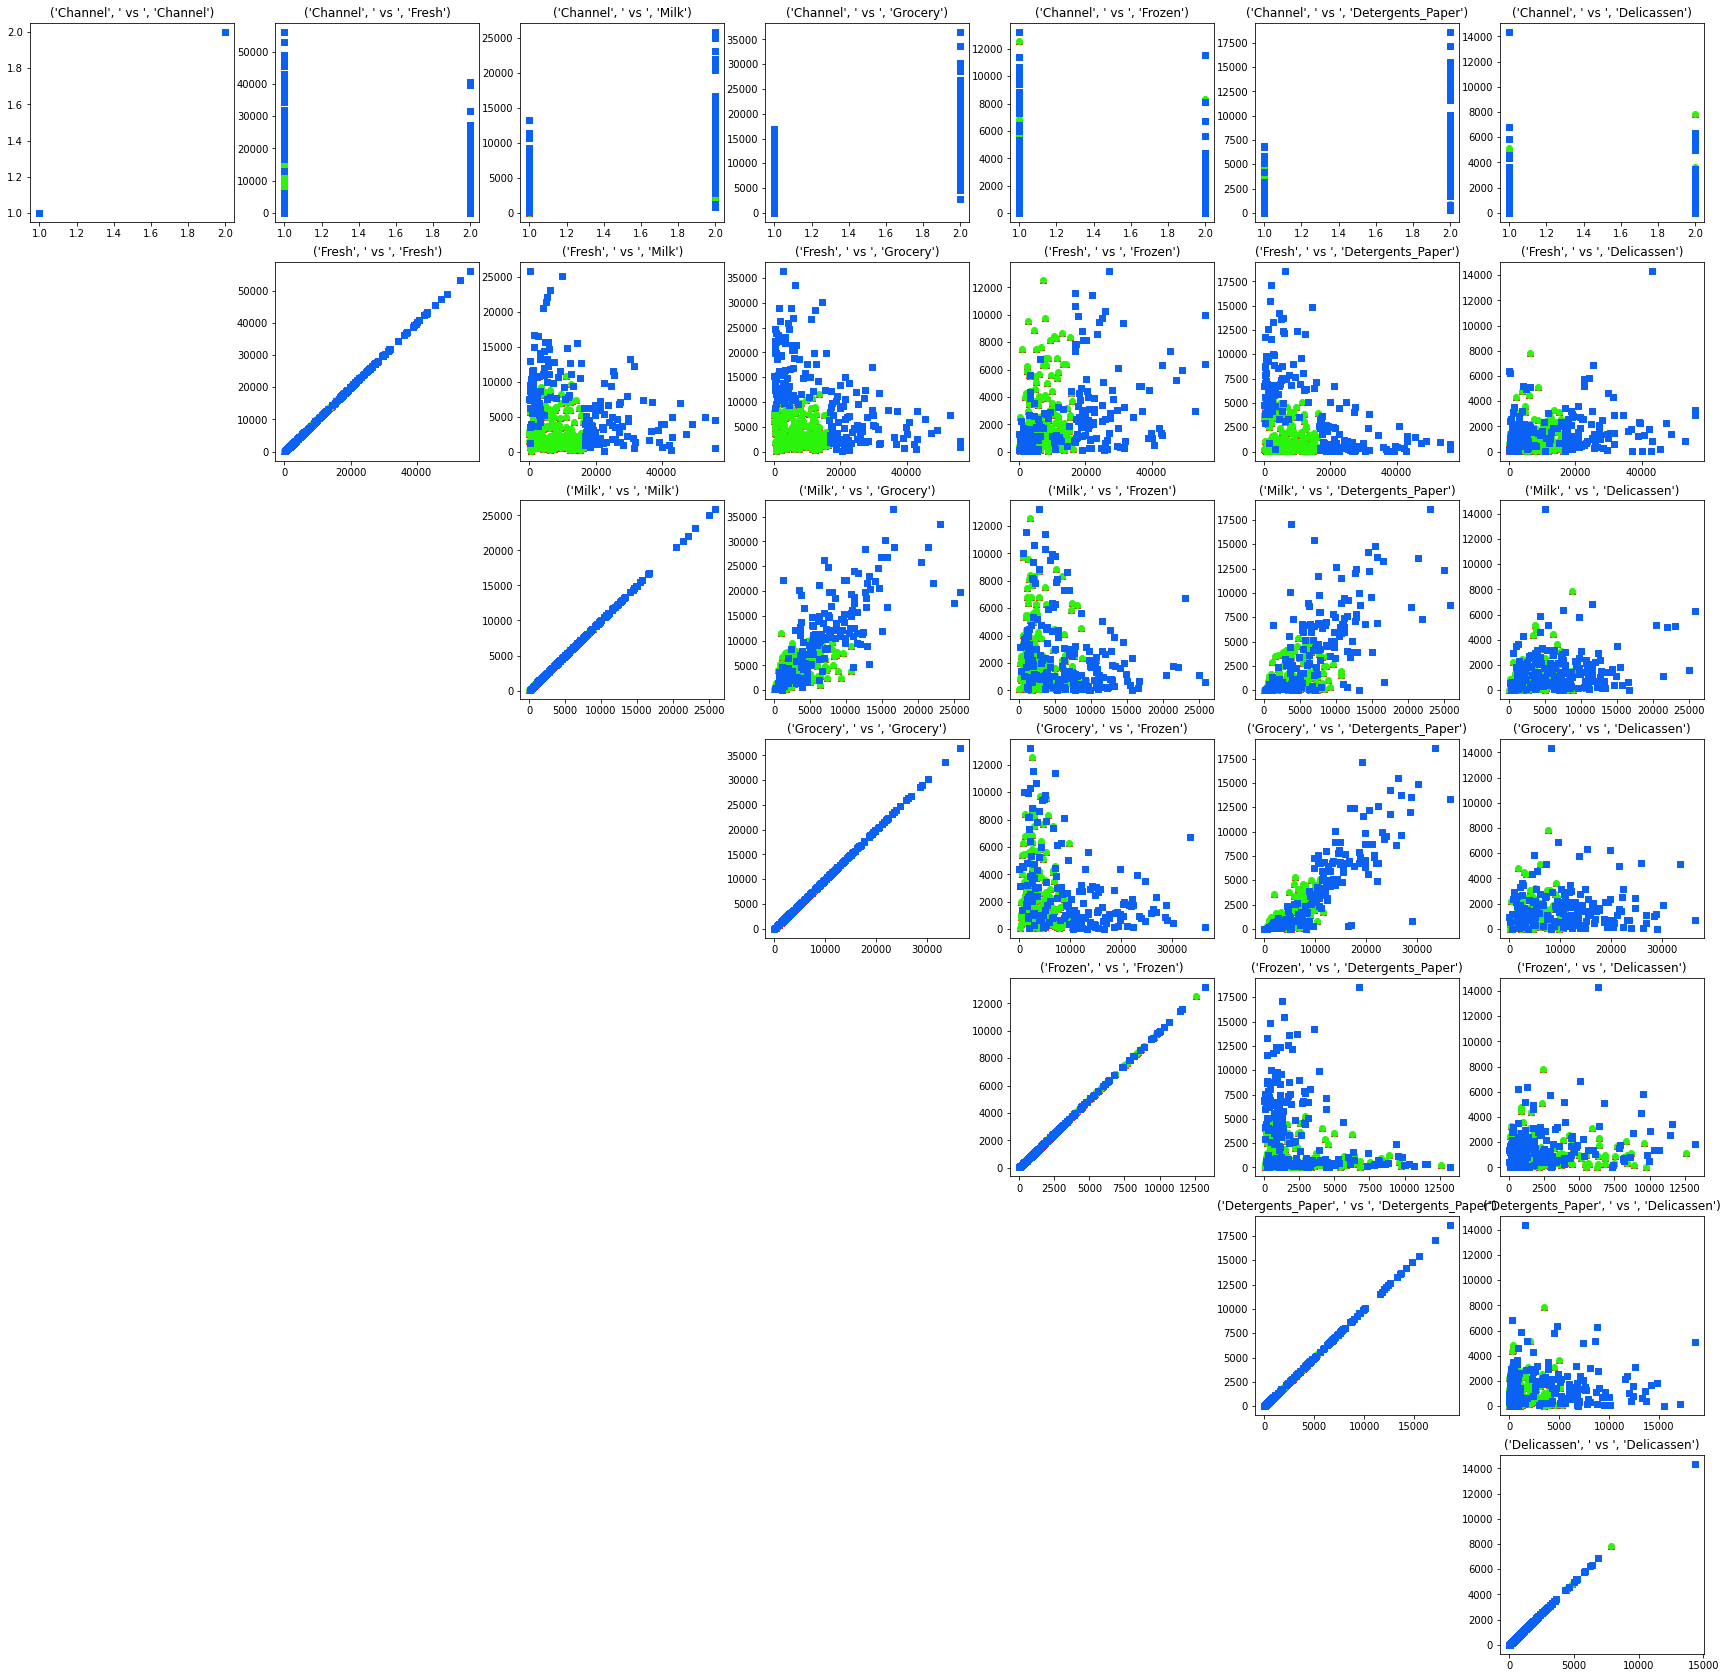

In [13]:
clusters_segun_silueta(ctm_lisbon,KMeans(),2,10,1)
clusters_segun_silueta(ctm_oporto,KMeans(),2,10,1)
clusters_segun_silueta(ctm_difreg,KMeans(),2,10,1)
clusters_segun_silueta(ctm_global,KMeans(),2,10,1)


---
##MEAN SHIFT

In [14]:
from sklearn.cluster import MeanShift #Importo mean shift
cms = MeanShift() #(Cluster Mean Shift) 

In [15]:
#implemento el clustering a los dataframes, cada uno con prefijo segun channel, region o global

reg_lisbon_ms=cms.fit(ctm_lisbon)
reg_oporto_ms=cms.fit(ctm_oporto)
reg_difreg_ms=cms.fit(ctm_difreg)
global_ms=cms.fit(ctm_global)

In [16]:
#evaluo el numero de clusters de cada uno
print('NUMERO DE CLUSTERS SEGUN MEAN SHIFT')
print('Lisbon: ',np.max(np.unique(reg_lisbon_ms.labels_)))
print('Oporto: ',np.max(np.unique(reg_oporto_ms.labels_)))
print('Otras regiones: ',np.max(np.unique(reg_difreg_ms.labels_)))
print('Global: ',np.max(np.unique(global_ms.labels_)))

NUMERO DE CLUSTERS SEGUN MEAN SHIFT
Lisbon:  1
Oporto:  1
Otras regiones:  1
Global:  1


No grafico pues todo es solo un gran conjunto. Resulta llamativo que si no corrijo outliers obtengo una separacion en 13 clusters.

##HIERARCHICAL CLUSTERING

In [17]:
from sklearn.cluster import AgglomerativeClustering

Para el numero de clusters intuyo por lo visto en mean shift que estara alrededor de 13, por lo que le pongo cierta desviacion alrededor de este valor para la estimacion de n. Debere incluir a este punto el coeficiente de silueta para el analisis. 
Ya que en el caso anterior todos los casos convergieron a 13 clusters analizo solo un caso para confirmar y luego asigno a todos segun este analisis.

El numero de clusters ideal segun coeficiente de silueta es:  4
[0 2 2 0 0 1 2 2 0 2 2 2 0 1 2 2 0 0 0 1 0 2 1 0 2 2 2 2 1 2 2 2 2 1 2 1 2
 2 1 2 3 1 1 1 2 0 0 2 1 1 2 2 0 2 1 1 2 2 3 3 2 2 1 2 0 0 1 0 1 2 2 2]
El numero de clusters ideal segun coeficiente de silueta es:  2
[1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0]
El numero de clusters ideal segun coeficiente de silueta es:  2
[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 

<Figure size 432x288 with 0 Axes>

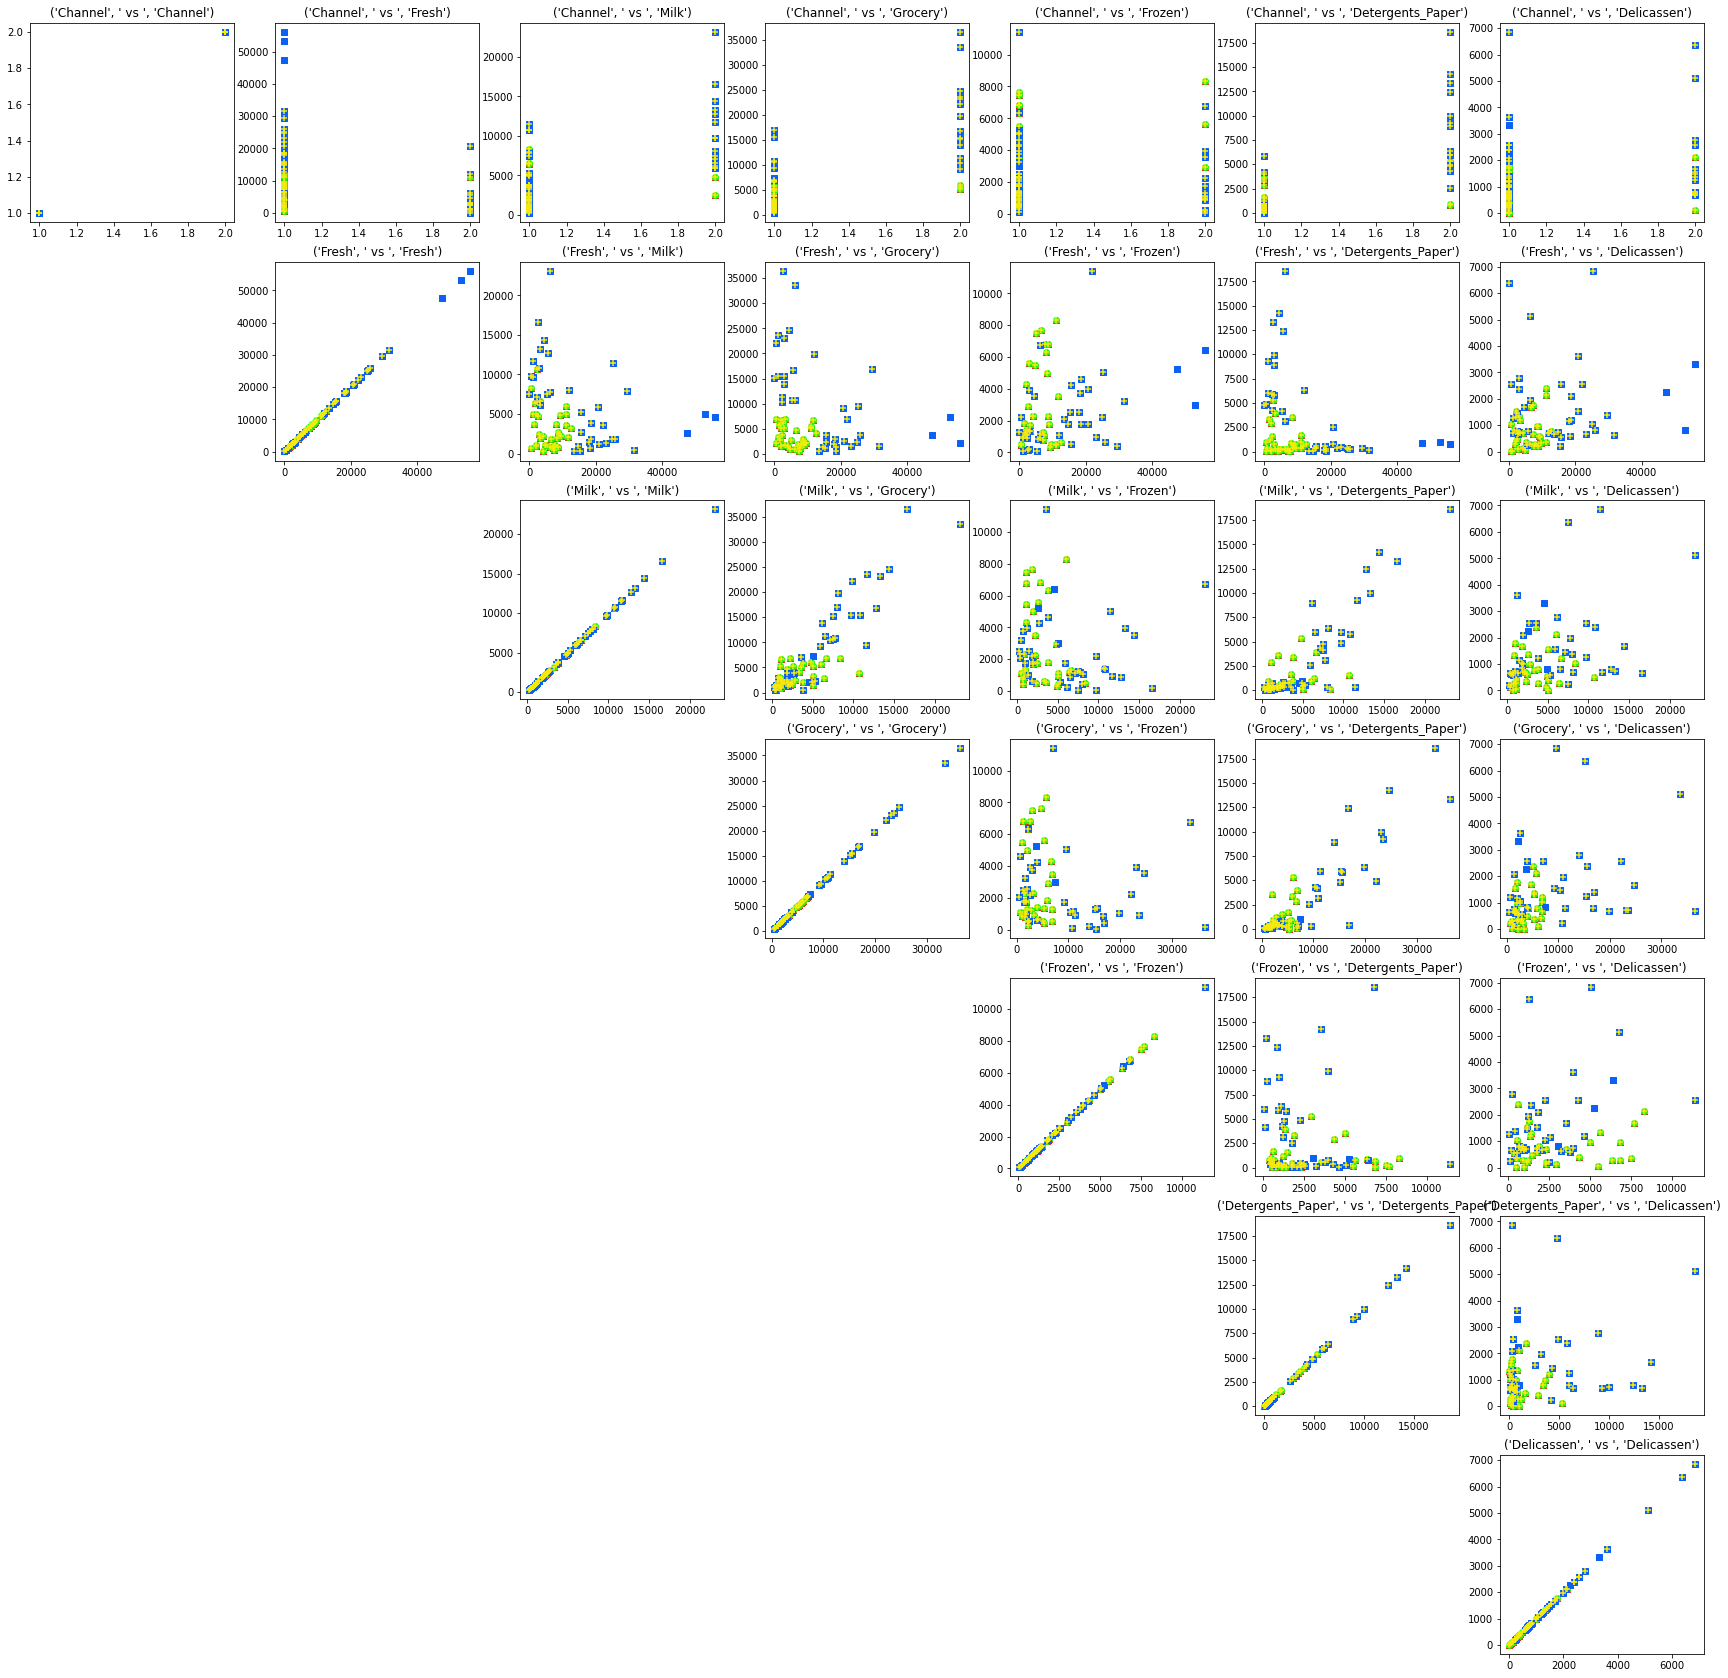

<Figure size 432x288 with 0 Axes>

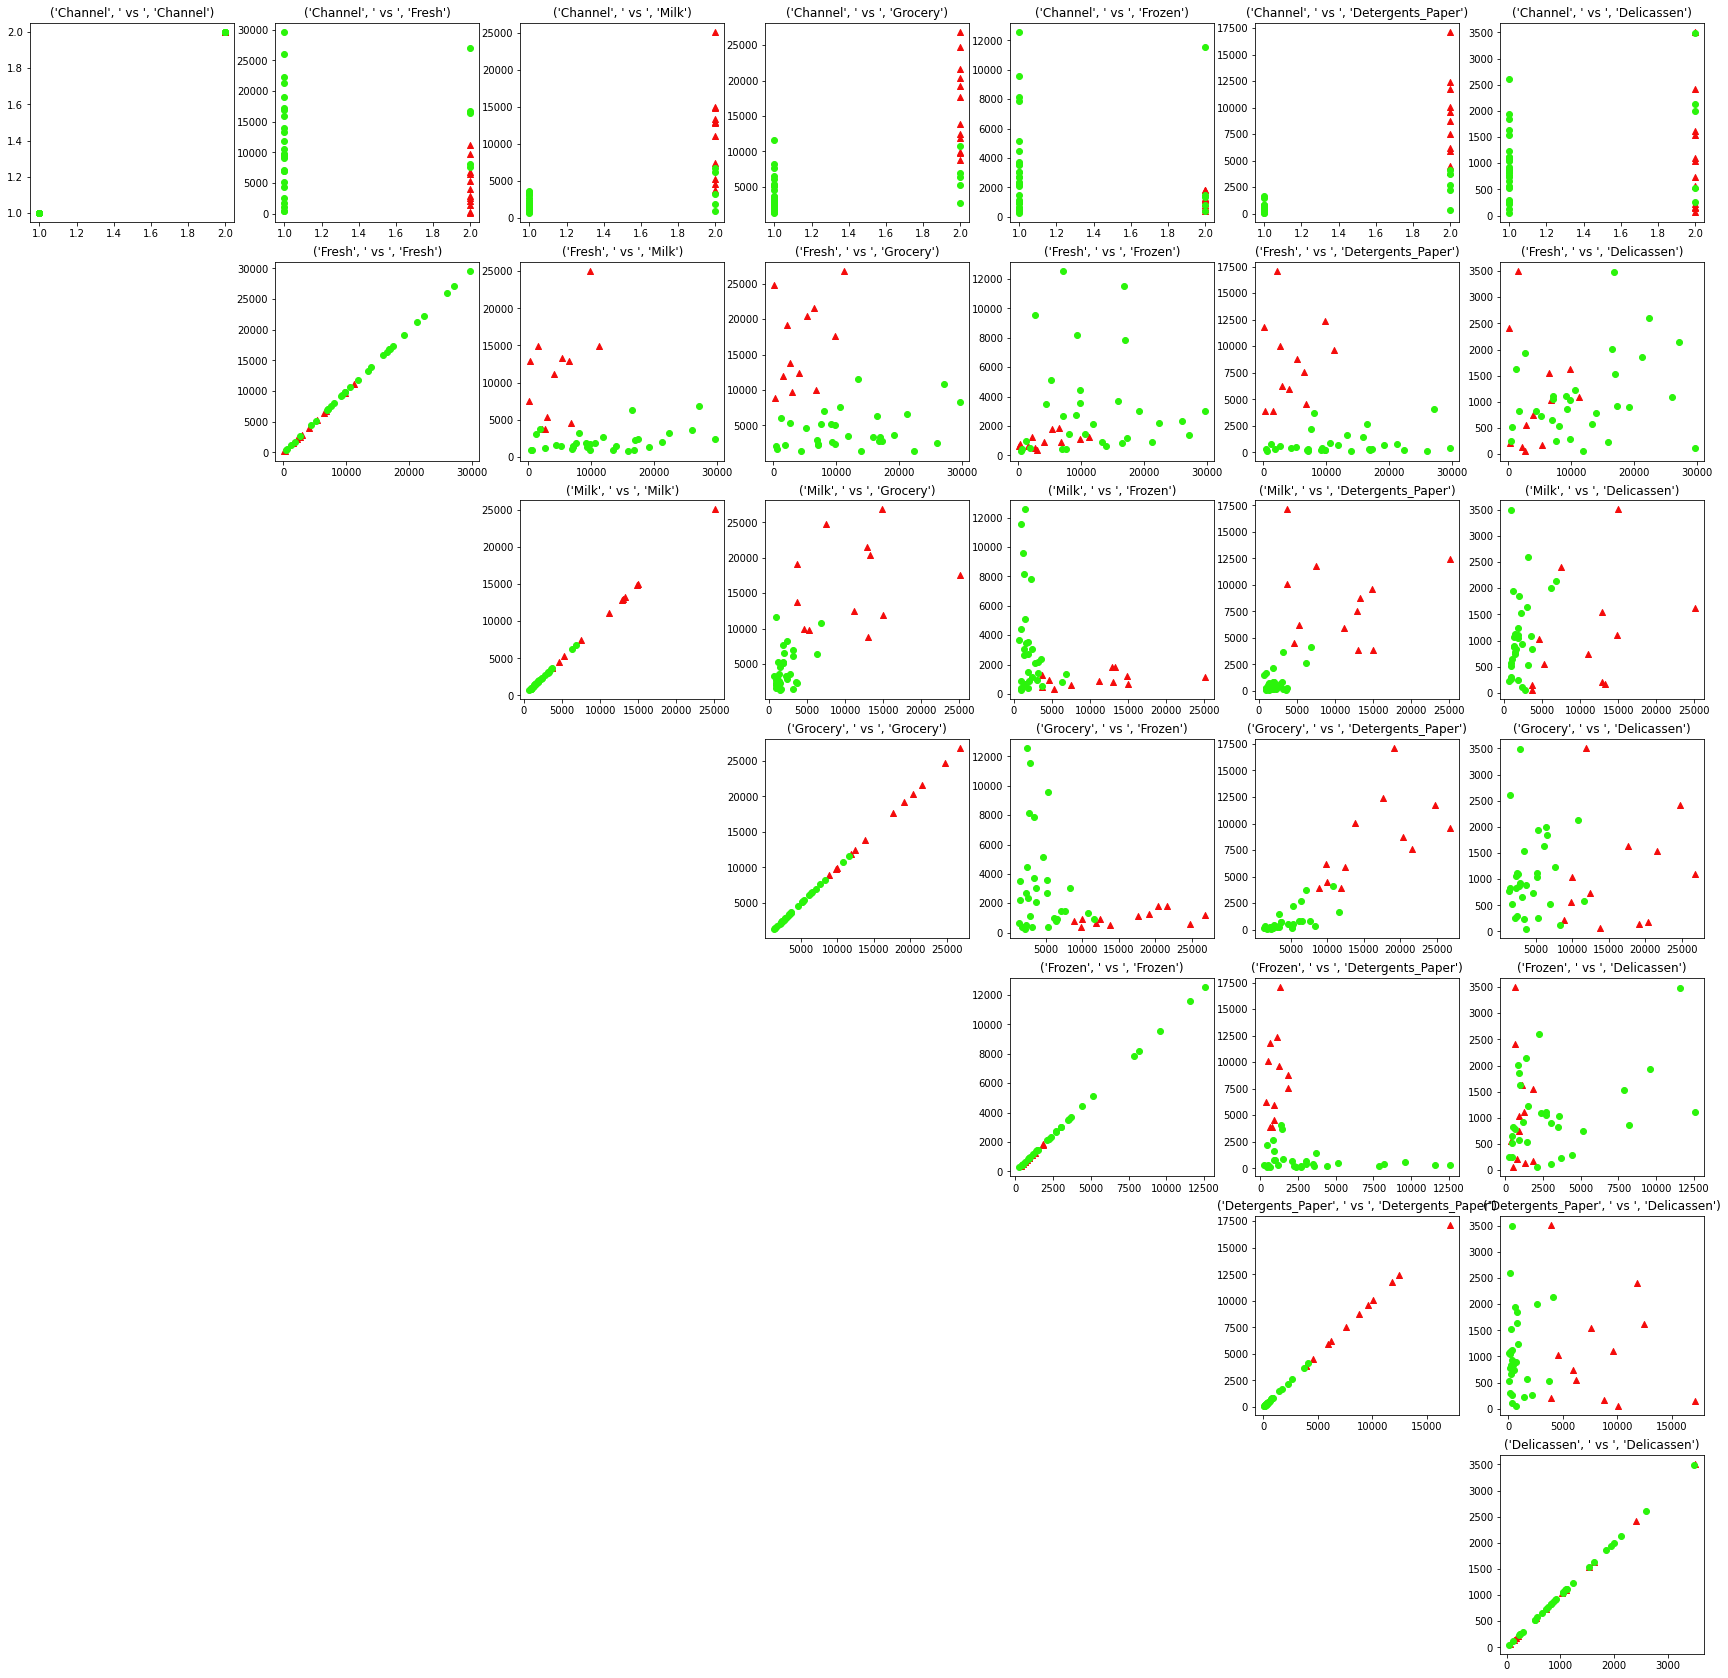

<Figure size 432x288 with 0 Axes>

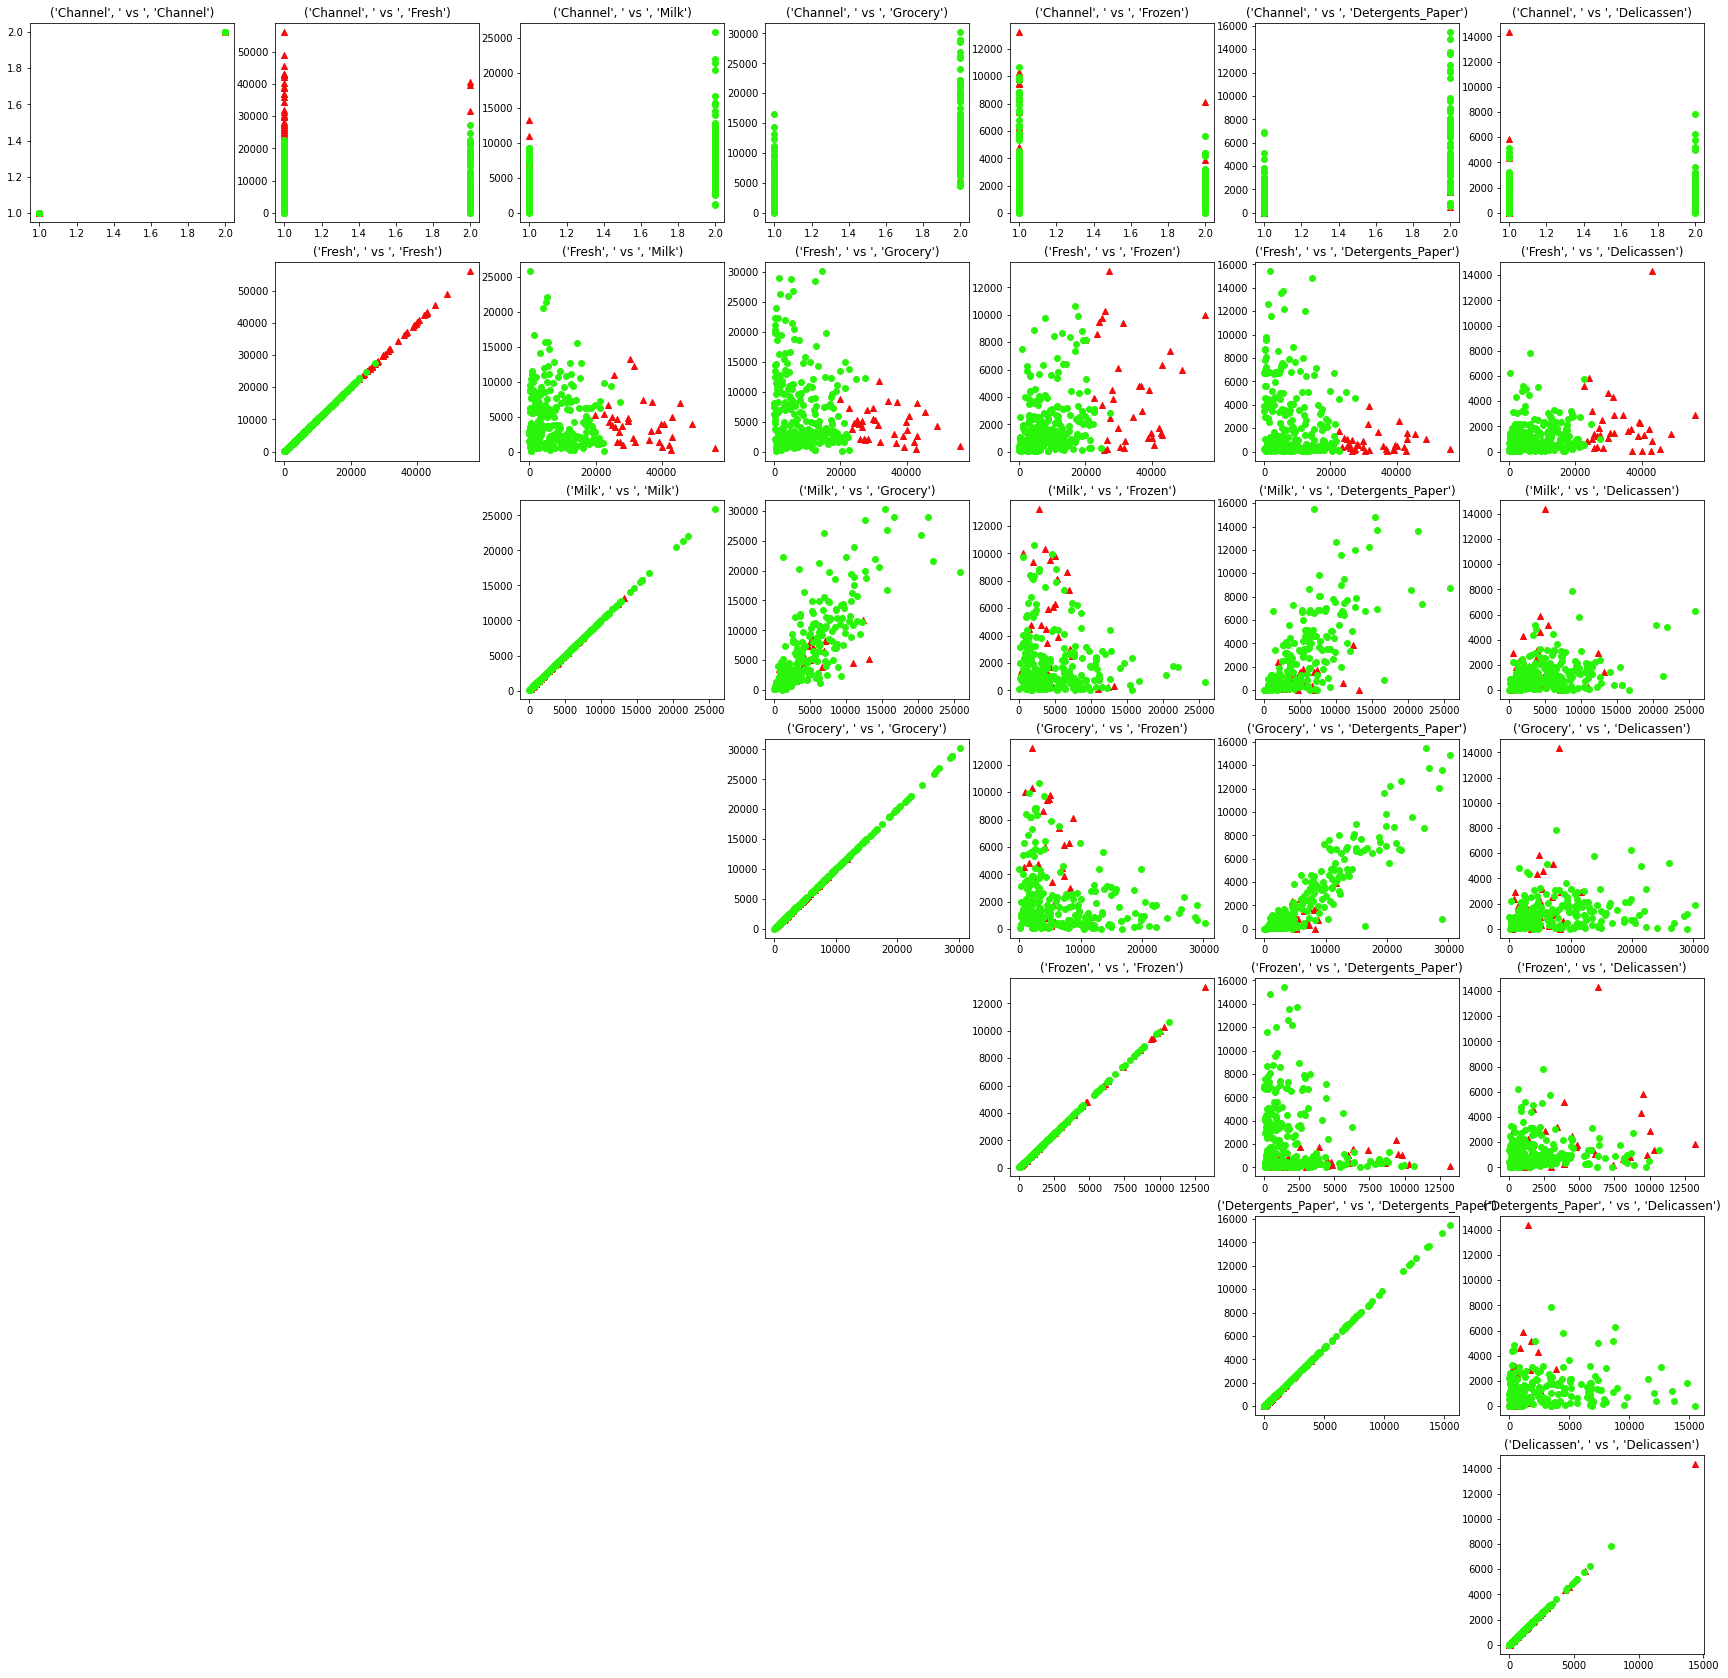

<Figure size 432x288 with 0 Axes>

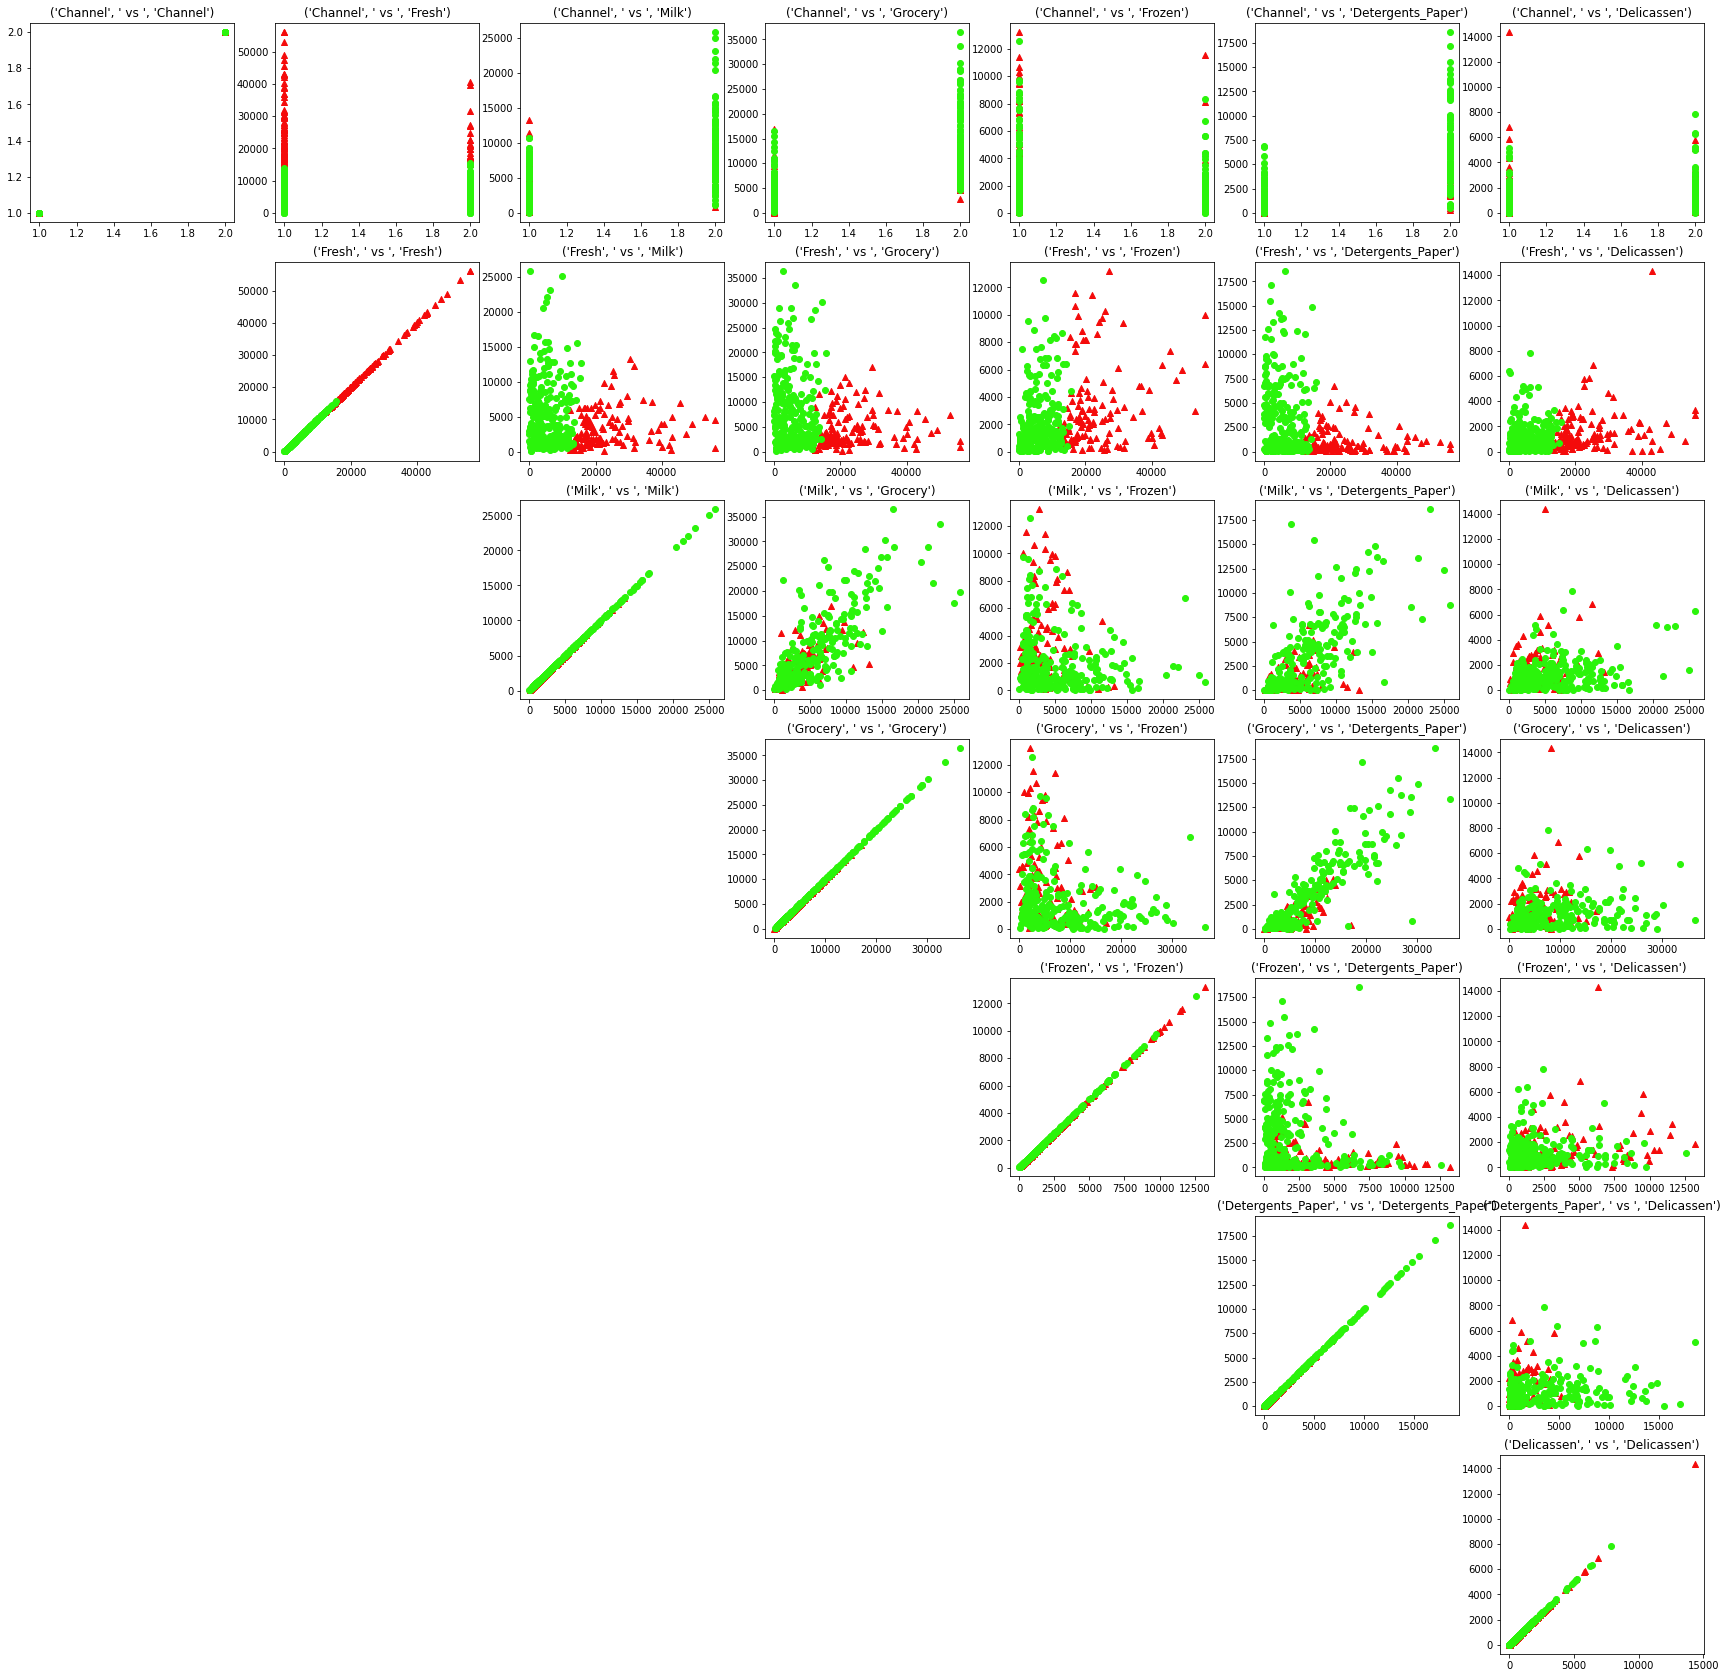

In [18]:
clusters_segun_silueta(ctm_lisbon,AgglomerativeClustering(),2,10,1)
clusters_segun_silueta(ctm_oporto,AgglomerativeClustering(),2,10,1)
clusters_segun_silueta(ctm_difreg,AgglomerativeClustering(),2,10,1)
clusters_segun_silueta(ctm_global,AgglomerativeClustering(),2,10,1)

---
#***RESULTADOS Y CONCLUSIONES***

Luego del analisis y de probar con bastantes configuraciones distintas no logro separar el dataset de una forma que de un verdadero *insight* en las tendencias de compra. Mi idea original era comparar los centroides de los cluster para obtener las caracteristicas de esos grupos pero creo que podria hacer un mejor trabajo incluso a ojo de lo que realizaron los metodos. Muchos de los graficos ilustran como se solapan los clusters, muy pocos presentan una separacion clara y estos incluso dejan que desear. Es posible que haciendo un analisis mas detallado, seleccionando cuidadosamente los datos a estudiar en base a todo lo desarrollado puedan descubrirse ciertos patrones. 

A PESAR DE ESTO tratare de mostrar algunas conclusiones simples que puedo hacer sobre el dataset. 
- Viendo la fila de graficos que compara todas las clases con "fresh" (segunda fila) podemos ver que existen ciertas tendencias en cuanto al cluster rojo. 
>- Grafico 1, "Fresh vs Fresh": Los compradores de este cluster tieden a gastar mas en productos frescos que los del cluster verde (visto en el grafico de fresh vs fresh).  
>- Grafico 2, "Fresh vs Milk": El cluster rojo tiende a gastar menos en leche que el verde.
>- Grafico 3, "Fresh vs Grocery": Los rojos suelen gastar menos en verduleria.
>- Grafico 5, "Fresh vs Detergents_Paper": Los rojos suelen gastar menos en articulos de limpieza.
>- Grafico 6, "Fresh vs Delicassen": Los rojos gastan aproximadamente las mismas cantidades en postres que los verdes.

Un analisis que creo mas rapido e intuitivo es ver los graficos sobre la diagonal. Estos muestran directamente donde se ubica los clusters en cuanto a gastos sobre la categoria correspondiente. 
- Vemos que hay una gran distincion en los gastos en en cuanto alimentos frescos  del segundo grafico de la diagonal, tal como vimos antes.
- El grafico de gastos en leche, verduleria y articulos de limpieza tiene una concentracion de los rojos sobre los valores mas chicos de gasto, pero los verdes tienen una distribucion mucho mas amplia.
- El resto de los graficos presenta a rojos y verdes bastante superpuestos y no se puede extraer informacion.


Una forma de resumir todo lo visto es que los compradores rojos gastan mucho mas en alimentos frescos que los verdes, mientras que gastan cantidades generalmente menores que los verdes en el resto de los rubros. Esto sin embargo no es una conclusion que me guste por lo superpuesto que esta el dataset, y sigo pensando que si le dedicara tiempo a desmenuzarlo mas y analizar distintas combinaciones podria encontrar patrones entre grupos mas reducidos en cuanto a tipos de gastos. 

---
#Referencias

Foro discutiendo el analisis de clustering no supervisado:
https://stats.stackexchange.com/questions/21807/evaluation-measures-of-goodness-or-validity-of-clustering-without-having-truth

Evaluation Metrics for Unsupervised Learning Algorithms:
https://arxiv.org/pdf/1905.05667.pdf

Metodos de clustering de sklearn, aplicaciones y restricciones:
https://scikit-learn.org/stable/modules/clustering.html#clustering

3 metodos para determinar el numero de clusters optimo: https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#elbow-method


